In [70]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [71]:
def get_score(context_size, model, category):
    disk_dir = "/mnt/data-poseidon/sumire/thesis"
    lang_list = os.listdir(disk_dir + f"/{context_size}")
    
    for id, lang in enumerate(lang_list):
        lang_list[id] = lang_list[id].replace("en-", "")
        lang_scores = {}
        
    for lang in lang_list:
        if category == None:
            score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score.txt'
        else:
            score_path =  disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/categorized/{category}/{category}_test_score.txt'
        #score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score.txt'
        if os.path.exists(score_path):
            with open(score_path,'r') as wf:
                lang_scores[lang] = wf.readlines()
        
        else:
            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]
            if model == "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit" and context_size in ["1-2", "1-3", "1-4", "1-5"]:
                print (score_path)
    bleu_list = []
    comet_list = []
    for score_list in lang_scores.values():
        bleu = score_list[0]
        if "sacrebleu" in bleu:
            bleu = bleu.replace("sacrebleu: ", "")
        else:
            bleu = bleu.replace("bleu: ", "")
        bleu = bleu.replace("\n", "")
        bleu = float(bleu)
        
        comet = score_list[1]
        comet = comet.replace("comet: ", "")
        comet = comet.replace("\n", "")
        comet = float(comet)
        bleu_list.append(bleu)
        comet_list.append(comet)
    return comet_list, bleu_list, lang_list


In [14]:
"""
def get_score_b(context_size, model):
    disk_dir = "/mnt/data-poseidon/sumire/thesis"
    lang_list = os.listdir(disk_dir + f"/{context_size}")
    
    for id, lang in enumerate(lang_list):
        lang_list[id] = lang_list[id].replace("en-", "")
    
    lang_scores = {}

    for lang in lang_list:
        score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score_with_b.txt'
        if os.path.exists(score_path):
            with open(score_path,'r') as wf:
                lang_scores[lang] = wf.readlines()
                
        else:
            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]
            #print (score_path)
       
    bleu_list = []
    comet_list = []
    for score_list in lang_scores.values():
        bleu = score_list[0]
        bleu = bleu.replace("bleu: ", "")
        bleu = bleu.replace("\n", "")
        bleu = float(bleu)
        
        comet = score_list[1]
        comet = comet.replace("comet: ", "")
        comet = comet.replace("\n", "")
        comet = float(comet)
        bleu_list.append(bleu)
        comet_list.append(comet)
    return comet_list, bleu_list, lang_list
"""

'\ndef get_score_b(context_size, model):\n    disk_dir = "/mnt/data-poseidon/sumire/thesis"\n    lang_list = os.listdir(disk_dir + f"/{context_size}")\n    \n    for id, lang in enumerate(lang_list):\n        lang_list[id] = lang_list[id].replace("en-", "")\n    \n    lang_scores = {}\n\n    for lang in lang_list:\n        score_path = disk_dir+f\'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score_with_b.txt\'\n        if os.path.exists(score_path):\n            with open(score_path,\'r\') as wf:\n                lang_scores[lang] = wf.readlines()\n                \n        else:\n            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]\n            #print (score_path)\n       \n    bleu_list = []\n    comet_list = []\n    for score_list in lang_scores.values():\n        bleu = score_list[0]\n        bleu = bleu.replace("bleu: ", "")\n        bleu = bleu.replace("\n", "")\n        bleu = float(bleu)\n        \n        comet = score_list[1]\n        comet = 

In [72]:
def get_and_return_scores(scenario, model, category):
    comet_list, bleu_list, lang_list = get_score(scenario, model, category)
    scores = {
        'model': model,
        'scenario': scenario,
        'category': category,
        'comet_scores': comet_list,
        'bleu_scores': bleu_list,
    }
    return scores, lang_list

"""
def get_and_return_scores_b(scenario, model):
    comet_list_b, bleu_list_b, lang_list_b = get_score_b(scenario, model)
    scores_b = {
        'model': model,
        'scenario': scenario,
        'comet_scores': comet_list_b,
        'bleu_scores': bleu_list_b,
    }
    return scores_b, lang_list_b
"""

models = ["xglm", 
          "llama", 
          "Llama-2-70b-instruct-v2", 
          "llama-p2", 
          "xglm-p2", 
          "llama-1024", 
          "Llama-2-70b-instruct-v2-p2", 
          "llama-p3", 
          "xglm-p3", 
          "Llama-2-70b-instruct-v2-p3", 
          "Llama-2-70b-instruct-v2-usas-zs-p3-#b#", 
          "Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit", 
          "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", 
          "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2",
         "Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta",
         "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-bsd"]
scenarios = ["1-1", "2-1", "3-1", "4-1", "5-1", "6-1", "7-1", "8-1", "9-1", "10-1", "2-1-ante", "ante-1", "10-1to3-1", "10-1to4-1", "10-1to5-1", "1-2", "1-3", "1-4", "1-5"]
categories = [None, "muda", "pronouns", "lexical_cohesion", "formality", "verb_form"]
results = []


for model in models:
    for scenario in scenarios:
        for category in categories:
            #print (scenario)
            scores, lang_list = get_and_return_scores(scenario, model, category)
            results.append(scores)


# Now you have a list of dictionaries containing the scores for each model and scenario
# You can access the results as needed
for result in results:
    if  result['model'] == "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit":
        print(f"Model: {result['model']}, Scenario: {result['scenario']}, Category: {result['category']}")
        print(f"COMET Scores: {result['comet_scores']}")
        print(f"BLEU Scores: {result['bleu_scores']}")
        print()


/mnt/data-poseidon/sumire/thesis/1-2/en-ar/Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-ar-1-2/categorized/muda/muda_test_score.txt
/mnt/data-poseidon/sumire/thesis/1-2/en-fr/Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-fr-1-2/categorized/muda/muda_test_score.txt
/mnt/data-poseidon/sumire/thesis/1-2/en-ja/Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-ja-1-2/categorized/muda/muda_test_score.txt
/mnt/data-poseidon/sumire/thesis/1-2/en-ko/Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-ko-1-2/categorized/muda/muda_test_score.txt
/mnt/data-poseidon/sumire/thesis/1-2/en-de/Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-de-1-2/categorized/muda/muda_test_score.txt
/mnt/data-poseidon/sumire/thesis/1-2/en-zh/Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-zh-1-2/categorized/muda/muda_test_score.txt
/mnt/data-poseidon/sumire/thesis/1-2/en-ko/Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-ko-1-2/categorized/pronouns/pronouns_test_score.txt
/mnt/data-poseidon/sumire/thesis/1-2/en-zh/Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-zh-1

In [19]:
"""
#withb
models_with_b = ["Llama-2-70b-instruct-v2-usas-zs-p3-#b#", "Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit"]
results_b = []

for model in models_with_b:
    for scenario in scenarios:
        scores_b, lang_list_b = get_and_return_scores_b(scenario, model)
        results_b.append(scores_b)

# Now you have a list of dictionaries containing the scores for each model and scenario
# You can access the results as needed
for result in results_b:
    print(f"Model: {result['model']}, Scenario: {result['scenario']}")
    print(f"COMET Scores: {result['comet_scores']}")
    print(f"BLEU Scores: {result['bleu_scores']}")
    print()
    
print (results_b)
"""

'\n#withb\nmodels_with_b = ["Llama-2-70b-instruct-v2-usas-zs-p3-#b#", "Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit"]\nresults_b = []\n\nfor model in models_with_b:\n    for scenario in scenarios:\n        scores_b, lang_list_b = get_and_return_scores_b(scenario, model)\n        results_b.append(scores_b)\n\n# Now you have a list of dictionaries containing the scores for each model and scenario\n# You can access the results as needed\nfor result in results_b:\n    print(f"Model: {result[\'model\']}, Scenario: {result[\'scenario\']}")\n    print(f"COMET Scores: {result[\'comet_scores\']}")\n    print(f"BLEU Scores: {result[\'bleu_scores\']}")\n    print()\n    \nprint (results_b)\n'

In [20]:
print (lang_list)

['ar', 'fr', 'ja', 'ko', 'de', 'zh']


In [7]:
[0.0]*len(lang_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [73]:
def scores_plot(model, category, base_model, comet, bleu):
    ### COMET
    # Generating positions for the bars
    x = np.arange(len(lang_list))  # The label locations
    width = 0.07  # The width of the bars
    
    model_scores = []
    for result in results:
        if result['model'] == f'{model}':
            model_scores.append(result)

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))
    
    
    #base_models = ["xglm", "llama", "Llama-2-70b-instruct-v2", "Llama-2-70b-instruct-v2-usas-zs-p1" ]
    """
    for i in model_scores:
        if i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
            #for base_model in base_models:
                #if base_model in model:
            for result in results:
                if result["model"] == base_model and result["scenario"] =="1-1":
                    print ("base_model 1-1 exists")
                    rects1 = ax.bar(x - width*4, result["comet_scores"], width, label=f'{model} 1-1')
    """
    
    
    if model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2":
        print ("yes")
        for i in model_scores:
            if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*4, i["comet_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*4, result["comet_scores"], width, label=f'{model} 1-1')  
            
            
            elif i['scenario'] == '2-1':
                rects2 = ax.bar(x - width*3, i["comet_scores"], width, label=f'{model} 2-1')
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*2, i["comet_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width , i["comet_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x , i["comet_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x + width*1 , i["comet_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*2, i["comet_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '2-1-ante':
                rects8 = ax.bar(x+ width*3, i["comet_scores"], width, label=f'{model} 2-1(ante sent)')
            elif i['scenario'] == 'ante-1':
                rects9 = ax.bar(x+ width*4, i["comet_scores"], width, label=f'{model} ante-1')
    
    elif model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta":
         for i in model_scores:
            if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*5, i["comet_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*5, result["comet_scores"], width, label=f'{model} 1-1')  
        
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*4, i["comet_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width*3 , i["comet_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x - width*2 , i["comet_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x -width  , i["comet_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*0, i["comet_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '8-1':
                rects8 = ax.bar(x+ width*1, i["comet_scores"], width, label=f'{model} 8-1')
            elif i['scenario'] == '9-1':
                rects2 = ax.bar(x + width*2, i["comet_scores"], width, label=f'{model} 9-1')
            elif i['scenario'] == '10-1':
                rects9 = ax.bar(x+ width*3, i["comet_scores"], width, label=f'{model} 10-1')
            
            elif i['scenario'] == '10-1to3-1':
                rects10 = ax.bar(x+ width*4, i["comet_scores"], width, label=f'{model} 10-1to3-1')
            elif i['scenario'] == '10-1to4-1':
                rects11 = ax.bar(x+ width*5, i["comet_scores"], width, label=f'{model} 10-1to4-1')
            elif i['scenario'] == '10-1to5-1':
                rects12 = ax.bar(x+ width*6, i["comet_scores"], width, label=f'{model} 10-1to5-1')
            #elif i['scenario'] == 'ante-1':
                #rects9 = ax.bar(x+ width*5, i["comet_scores"], width, label=f'{model} ante-1')
        
    else:
        for i in model_scores:
            if i['category']==category:
                if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
                    print("equivalent 1-1 exists")
                    rects1 = ax.bar(x - width*4, i["comet_scores"], width, label= f'1-1') # Ja, FR is not continuous shot anymore
                elif i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
                    for result in results:
                        if result["model"] == base_model and result["scenario"] =="1-1":
                            rects1 = ax.bar(x - width*4, result["comet_scores"], width, label=f'1-1')  


                elif i['scenario'] == '2-1':
                    rects2 = ax.bar(x - width*3, i["comet_scores"], width, label=f'2-1')
                elif i['scenario'] == '3-1':
                    rects3 = ax.bar(x - width*2, i["comet_scores"], width, label=f'3-1')
                elif i['scenario'] == '4-1':
                    rects4= ax.bar(x - width , i["comet_scores"], width, label=f'4-1')
                elif i['scenario'] == '5-1':
                    rects5 = ax.bar(x , i["comet_scores"], width, label=f'5-1')
                elif i['scenario'] == '1-2':
                    rects6 = ax.bar(x + width*1 , i["comet_scores"], width, label=f'1-2')
                elif i['scenario'] == '1-3':
                    rects7 = ax.bar(x+ width*2, i["comet_scores"], width, label=f'1-3')
                elif i['scenario'] == '1-4':
                    rects8 = ax.bar(x+ width*3, i["comet_scores"], width, label=f'1-4')
                elif i['scenario'] == '1-5':
                    rects9 = ax.bar(x+ width*4, i["comet_scores"], width, label=f'1-5')
    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(comet[0], comet[1])
    
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel('Scores')
    if category == None:
        ax.set_title(f'-{model}- COMET')
    else:
        ax.set_title(f'{category}-{model}- COMET')
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    ax.legend(loc='best')

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    
    
    ###BLEU 
    # Generating positions for the bars
    #x = np.arange(len(lang_list))  # The label locations
    #width = 0.1  # The width of the bars

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))
    
    if model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2":
        print ("yes")
        for i in model_scores:
            if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*4, i["bleu_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot a
            
            elif i['scenario'] == '1-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*4, result["bleu_scores"], width, label=f'{model} 1-1')     
            elif i['scenario'] == '2-1':
                rects2 = ax.bar(x - width*3, i["bleu_scores"], width, label=f'{model} 2-1')
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*2, i["bleu_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width*1, i["bleu_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x, i["bleu_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x + width*1 , i["bleu_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*2, i["bleu_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '2-1-ante':
                rects8 = ax.bar(x+ width*3, i["bleu_scores"], width, label=f'{model} 2-1(ante sent)')
            elif i['scenario'] == 'ante-1':
                rects9 = ax.bar(x+ width*4, i["bleu_scores"], width, label=f'{model} ante-1')
                
    elif model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta":
        print ("zwwwwwwwww")
        for i in model_scores:     
            if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*5, i["bleu_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '1-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*5, result["bleu_scores"], width, label=f'{model} 1-1')  
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*4, i["bleu_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width*3 , i["bleu_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x - width*2 , i["bleu_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x - width  , i["bleu_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*0, i["bleu_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '8-1':
                rects8 = ax.bar(x+ width*1, i["bleu_scores"], width, label=f'{model} 8-1')
            elif i['scenario'] == '9-1':
                rects2 = ax.bar(x + width*2, i["bleu_scores"], width, label=f'{model} 9-1')
            elif i['scenario'] == '10-1':
                rects9 = ax.bar(x+ width*3, i["bleu_scores"], width, label=f'{model} 10-1')
            elif i['scenario'] == '10-1to3-1':
                rects10 = ax.bar(x+ width*4, i["bleu_scores"], width, label=f'{model} 10-1to3-1')
            elif i['scenario'] == '10-1to4-1':
                rects11 = ax.bar(x+ width*5, i["bleu_scores"], width, label=f'{model} 10-1to4-1')
            elif i['scenario'] == '10-1to5-1':
                rects12 = ax.bar(x+ width*6, i["bleu_scores"], width, label=f'{model} 10-1to5-1')
    else: 
        for i in model_scores:
            if i['category']==category:
                if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                    print("equivalent 1-1 exists")
                    rects1 = ax.bar(x - width*4, i["bleu_scores"], width, label= f'1-1') # Ja, FR is not continuous shot anymore
                elif i['scenario'] == '1-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                    for result in results:
                        if result["model"] == base_model and result["scenario"] =="1-1":
                            rects1 = ax.bar(x - width*4, result["bleu_scores"], width, label=f'1-1')  
                
                elif i['scenario'] == '2-1':
                    rects2 = ax.bar(x - width*3, i["bleu_scores"], width, label=f'2-1')
                elif i['scenario'] == '3-1':
                    rects3 = ax.bar(x - width*2, i["bleu_scores"], width, label=f'3-1')
                elif i['scenario'] == '4-1':
                    rects4= ax.bar(x - width*1 , i["bleu_scores"], width, label=f'4-1')
                elif i['scenario'] == '5-1':
                    rects5 = ax.bar(x + width*0, i["bleu_scores"], width, label=f'5-1')
                elif i['scenario'] == '1-2':
                    rects5 = ax.bar(x + width*1, i["bleu_scores"], width, label=f'1-2')
                elif i['scenario'] == '1-3':
                    rects5 = ax.bar(x + width*2, i["bleu_scores"], width, label=f'1-3')
                elif i['scenario'] == '1-4':
                    rects8 = ax.bar(x+ width*3, i["bleu_scores"], width, label=f'1-4')
                elif i['scenario'] == '1-5':
                    rects8 = ax.bar(x+ width*4, i["bleu_scores"], width, label=f'1-5')

    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(bleu[0], bleu[1])
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel('Scores')
    if category == None:
        ax.set_title(f'-{model}- BLEU')
    else:
        ax.set_title(f'{category}-{model}- BLEU')
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    ax.legend(loc='best')

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    

In [22]:
"""
def scores_plot_b(model):
    ### COMET
    # Generating positions for the bars
    x = np.arange(len(lang_list))  # The label locations
    width = 0.1  # The width of the bars
    
    model_scores = []
    for result in results_b:
        if result['model'] == f'{model}':
            model_scores.append(result)
    #print (xglm_comets)

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))
        
    for i in model_scores:
        print (i)
        # add 1-1 score from test_score.txt, instead of test_score_with_b.txt
        if i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
            print("equivalent 1-1 does not exists")
            for result in results:
                if result['scenario']=='1-1' and result['model'] == f'{model}':
                    model_scores.append(result)
        
    
    for i in model_scores:

        if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
            rects1 = ax.bar(x - width*2, i["comet_scores"], width, label=f'{model} 1-1') # Ja, FR is not continuous shot anymore
            print("equivalent 1-1 exists")
        elif i['scenario'] == '2-1':
            rects2 = ax.bar(x - width, i["comet_scores"], width, label=f'{model} 2-1')
        elif i['scenario'] == '3-1':
            rects3 = ax.bar(x, i["comet_scores"], width, label=f'{model} 3-1')
        elif i['scenario'] == '4-1':
            rects4= ax.bar(x + width, i["comet_scores"], width, label=f'{model} 4-1')
        elif i['scenario'] == '5-1':
            rects5 = ax.bar(x + width*2, i["comet_scores"], width, label=f'{model} 5-1')
    
    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(0, 1)
    
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel('Scores')
    ax.set_title(f'-{model}--WITH<#b#> COMET')
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    ax.legend(loc='lower left')

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    
    
    ###BLEU 
    # Generating positions for the bars
    #x = np.arange(len(lang_list))  # The label locations
    #width = 0.1  # The width of the bars

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))

                            
    for i in model_scores:
        if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
            print("equivalent 1-1 exists")
            rects1 = ax.bar(x - width*2, i["bleu_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
        elif i['scenario'] == '2-1':
            rects2 = ax.bar(x - width, i["bleu_scores"], width, label=f'{model}2-1')
        elif i['scenario'] == '3-1':
            rects3 = ax.bar(x, i["bleu_scores"], width, label=f'{model} 3-1')
        elif i['scenario'] == '4-1':
            rects4= ax.bar(x + width, i["bleu_scores"], width, label=f'{model} 4-1')
        elif i['scenario'] == '5-1':
            rects5 = ax.bar(x + width*2, i["bleu_scores"], width, label=f'{model} 5-1')

    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(0, 50)
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel('Scores')
    ax.set_title(f'-{model}-WITH<#b#> BLEU')
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    ax.legend(loc='lower left')

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
"""

# Summarized Context

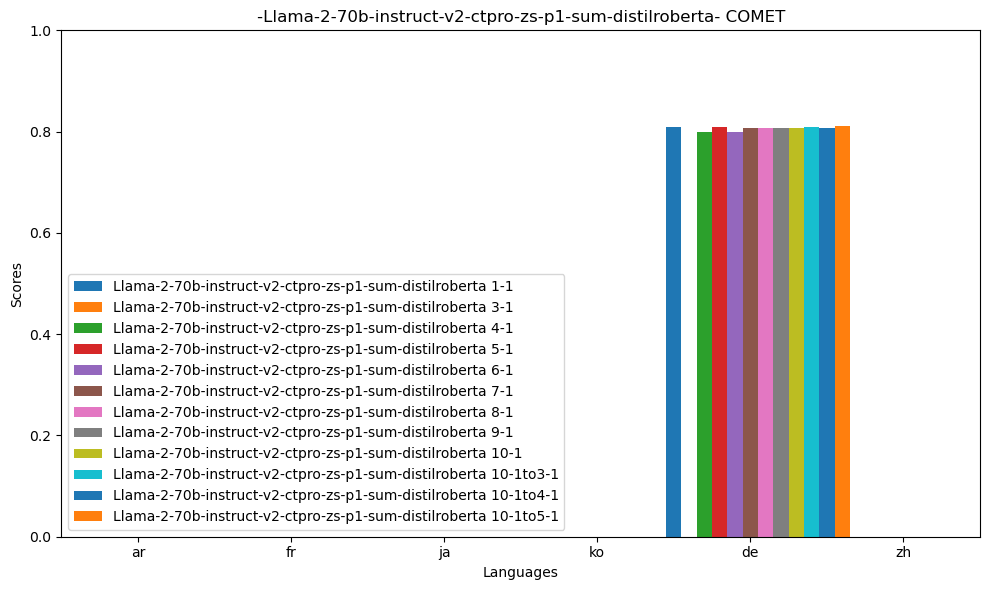

zwwwwwwwww


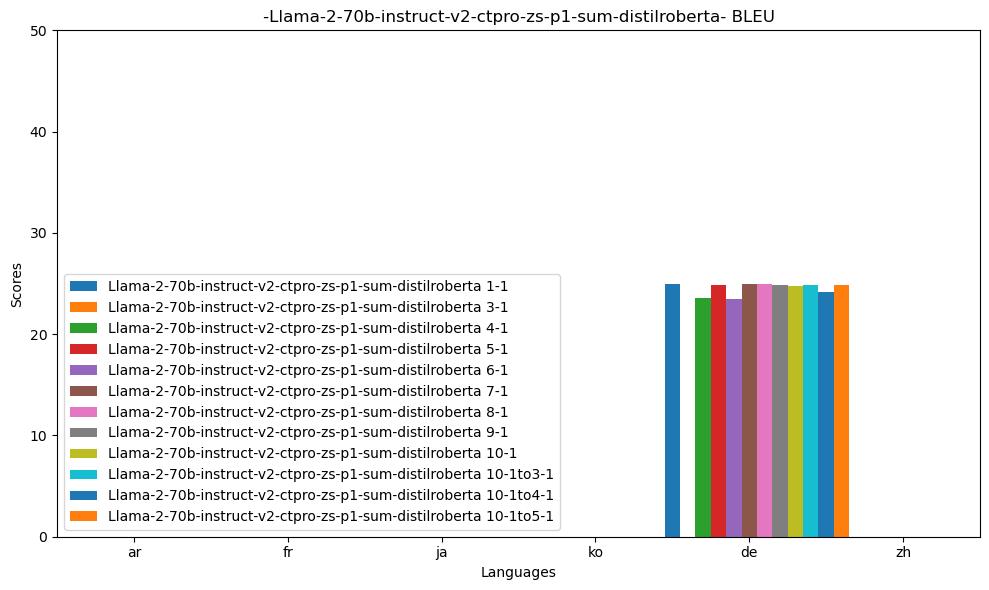

In [128]:
scores_plot(model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta", base_model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", comet=(0,1), bleu=(0,50)) 

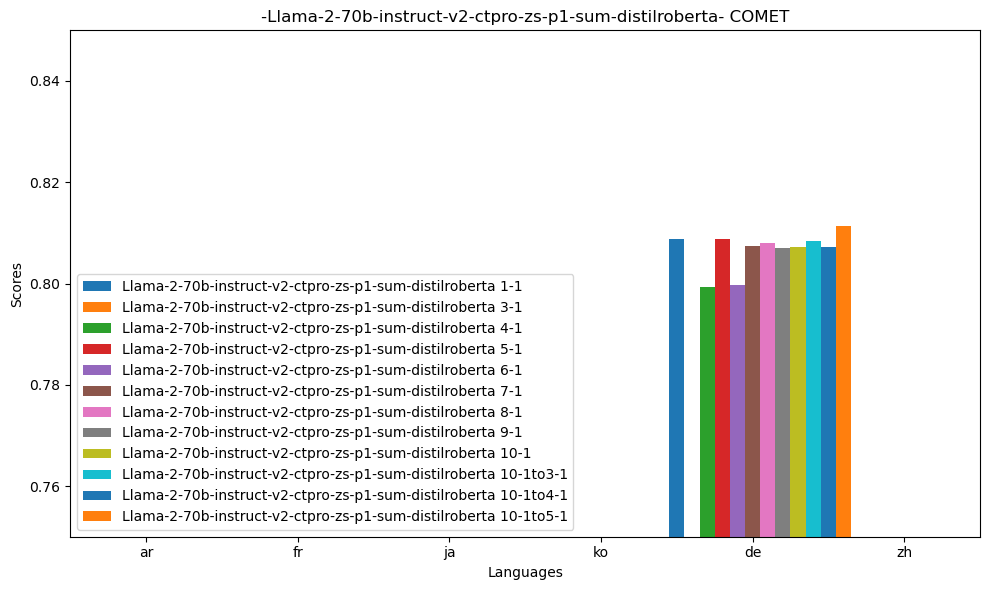

zwwwwwwwww


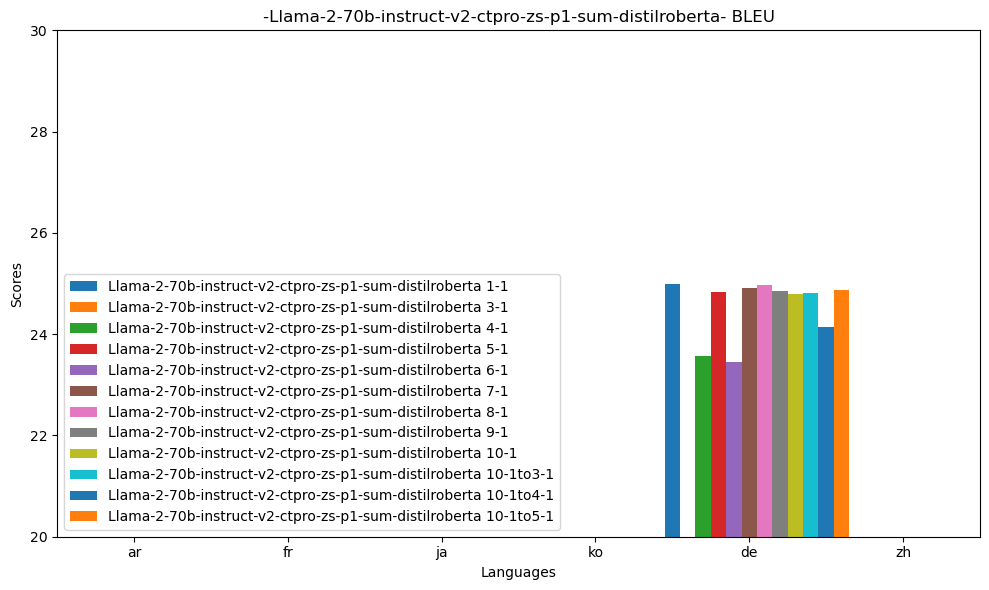

In [129]:
scores_plot(model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta", base_model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", comet=(0.75,0.85), bleu=(20,30)) 

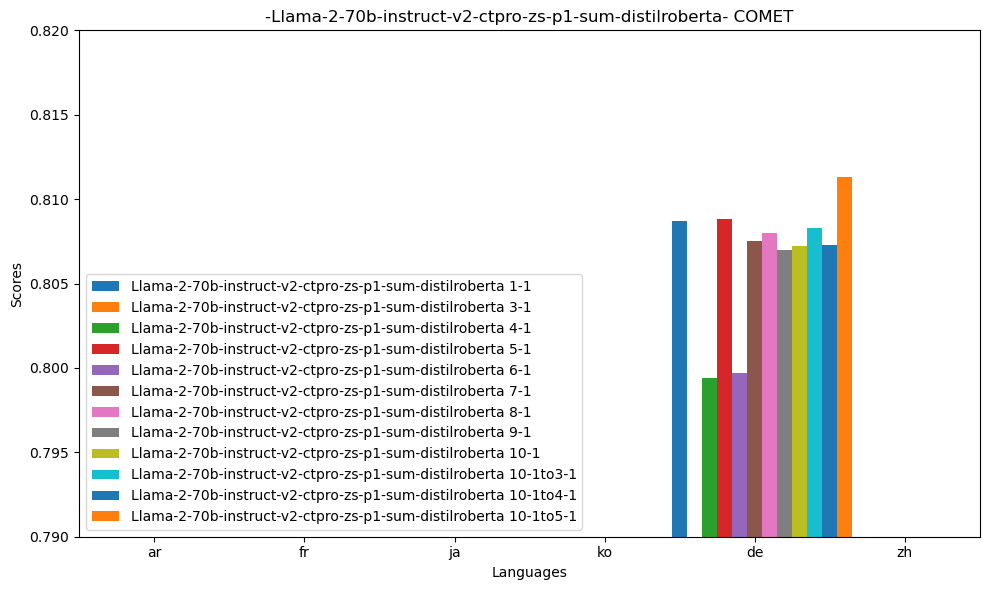

zwwwwwwwww


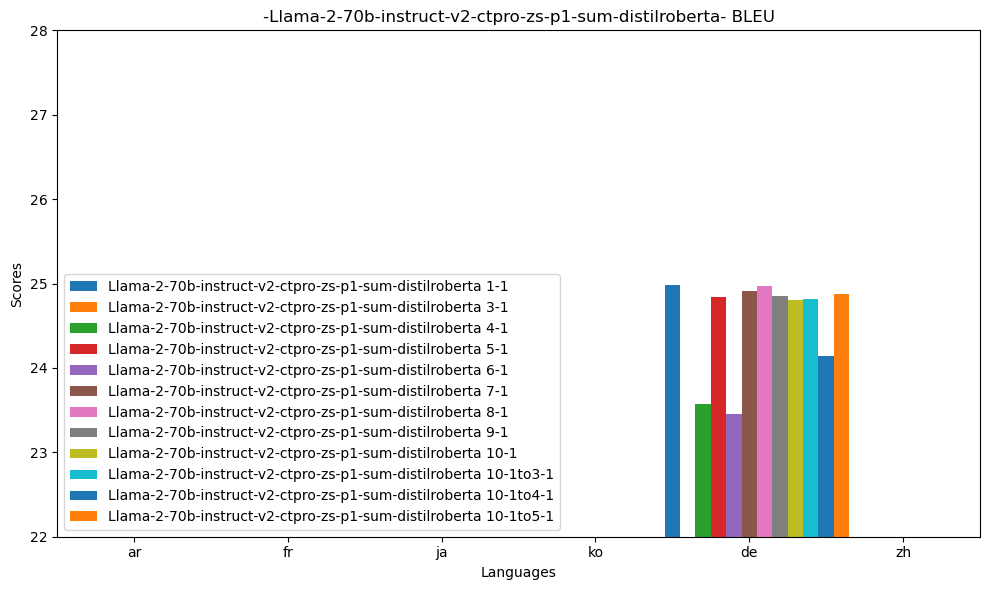

In [130]:
#ZOOM IN
scores_plot(model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta", base_model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", comet=(0.79,0.82), bleu=(22,28)) 

# BSD Dataset

no
equivalent 1-1 exists


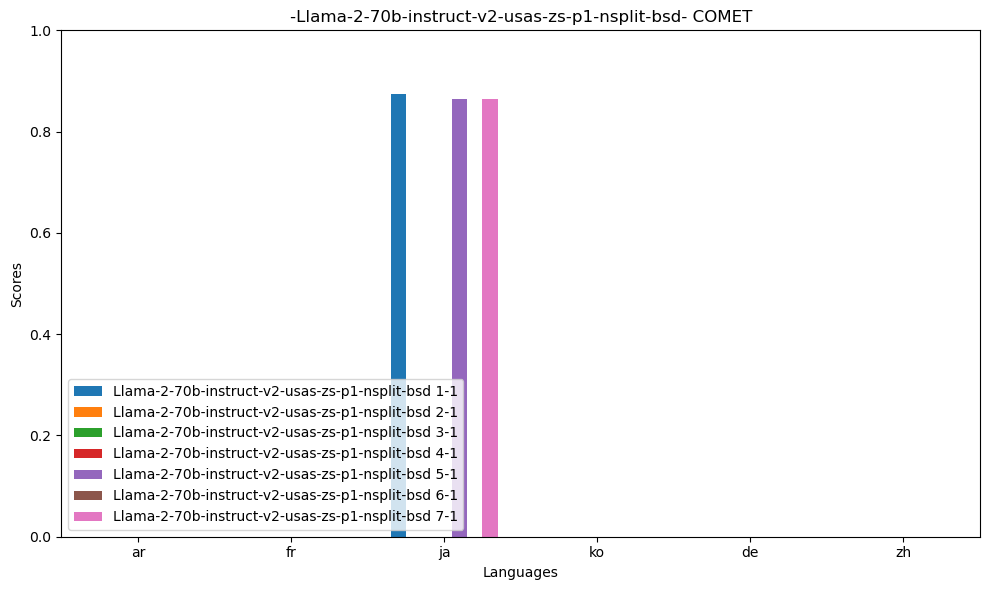

no
equivalent 1-1 exists
no
no
no
no
no
no
no
no
no
no
no
no
no
no


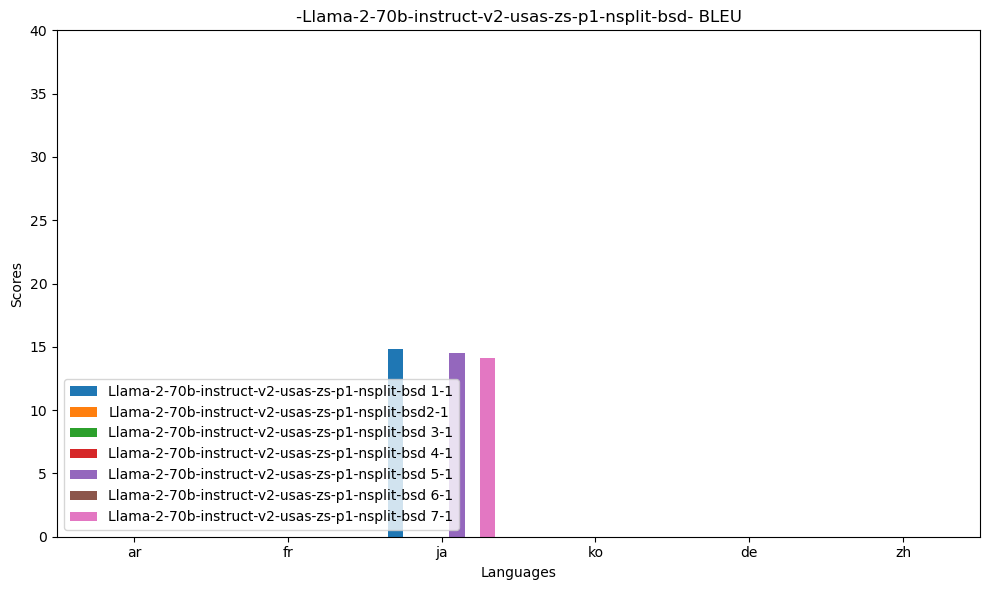

In [131]:
scores_plot("Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-bsd", "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-bsd", comet=(0,1), bleu=(0,40))

# Contrapro 

yes
equivalent 1-1 exists


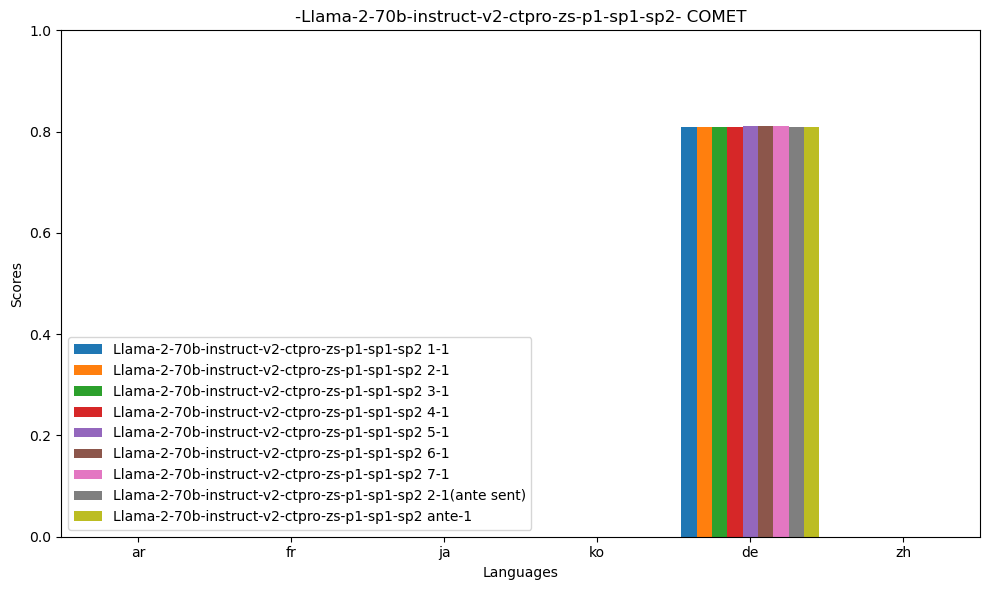

yes
equivalent 1-1 exists


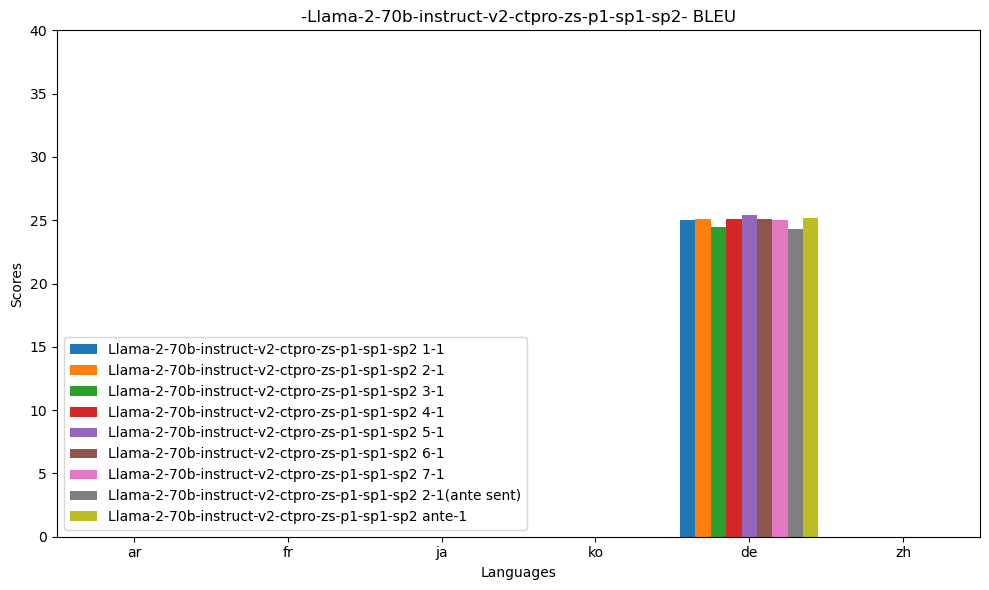

In [132]:
scores_plot("Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", comet=(0,1), bleu=(0,40))

yes
equivalent 1-1 exists


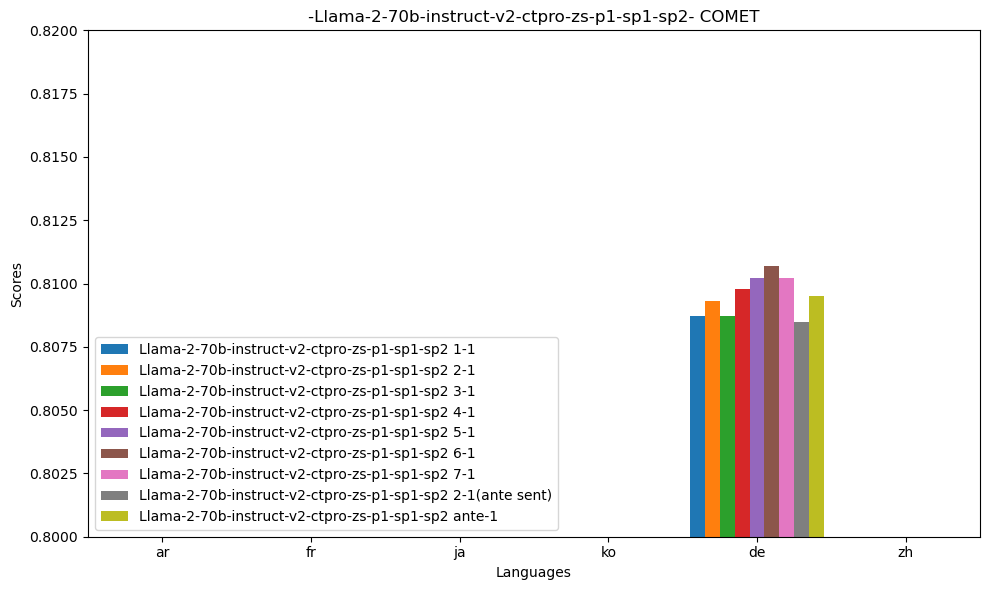

yes
equivalent 1-1 exists


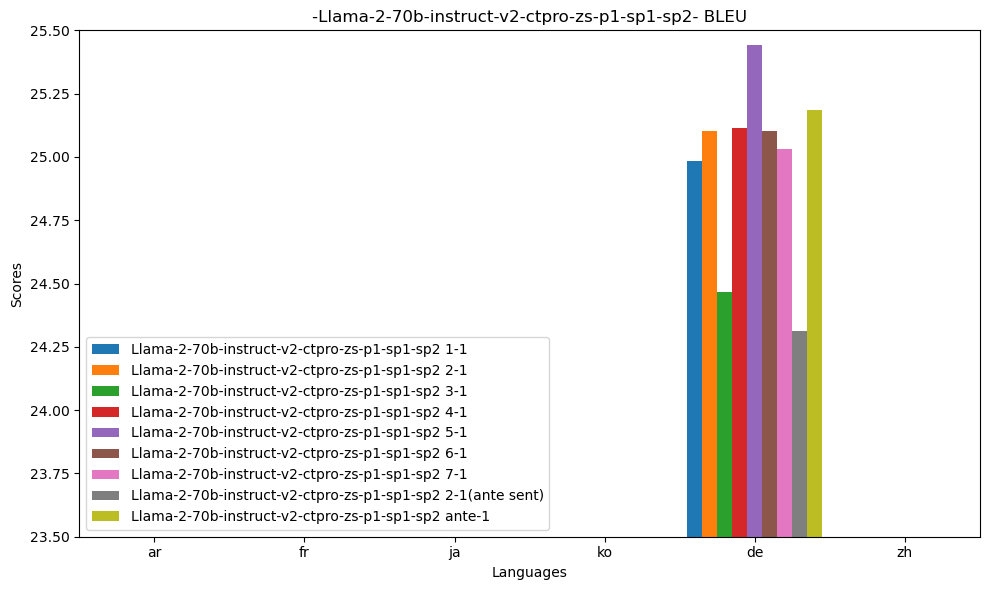

In [134]:
scores_plot("Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", comet=(0.8,0.82), bleu=(23.5,25.5))

# TED Prompt1 

equivalent 1-1 exists


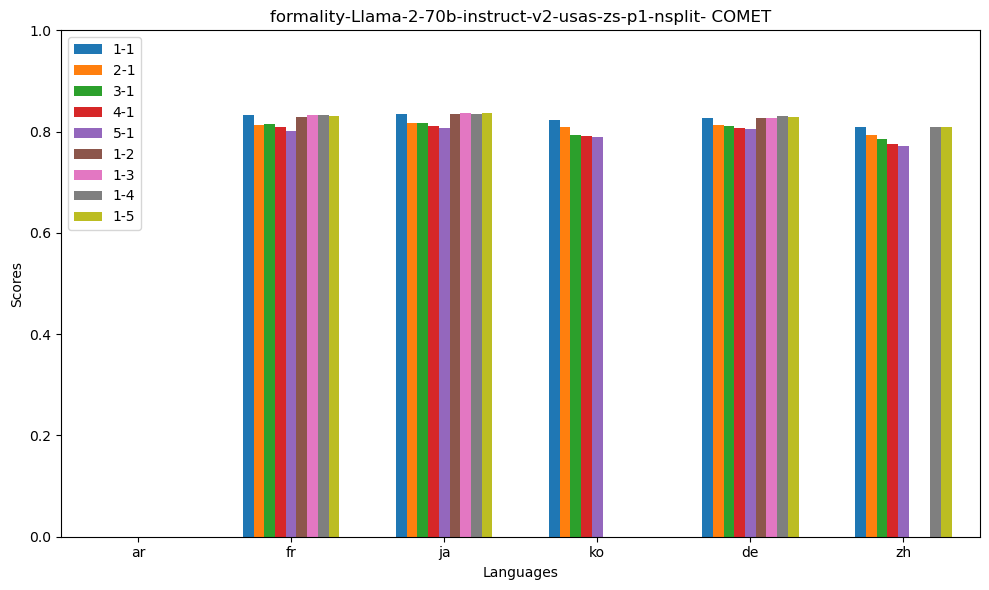

equivalent 1-1 exists


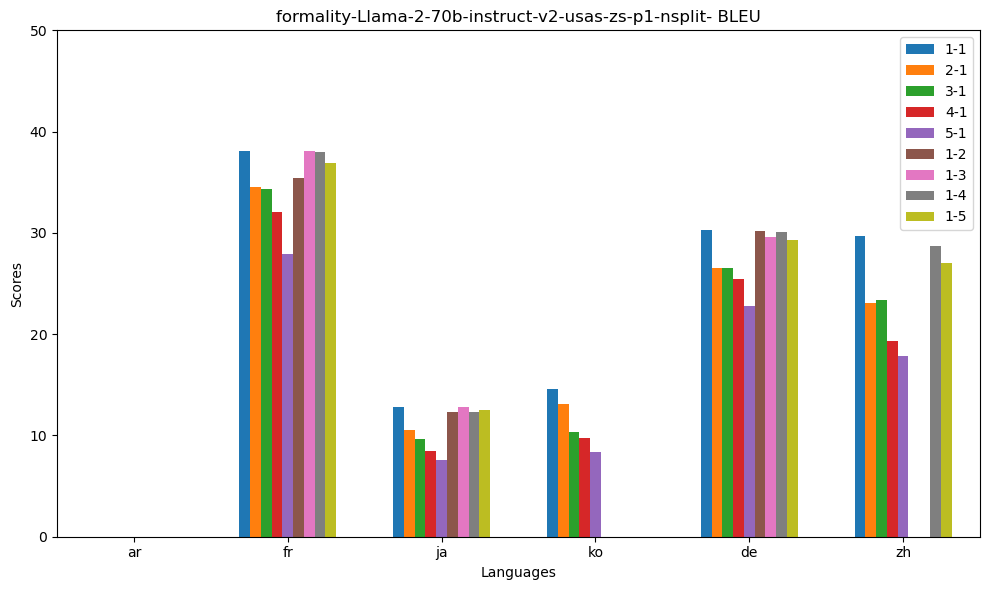

In [74]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = "formality", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50)) 

equivalent 1-1 exists


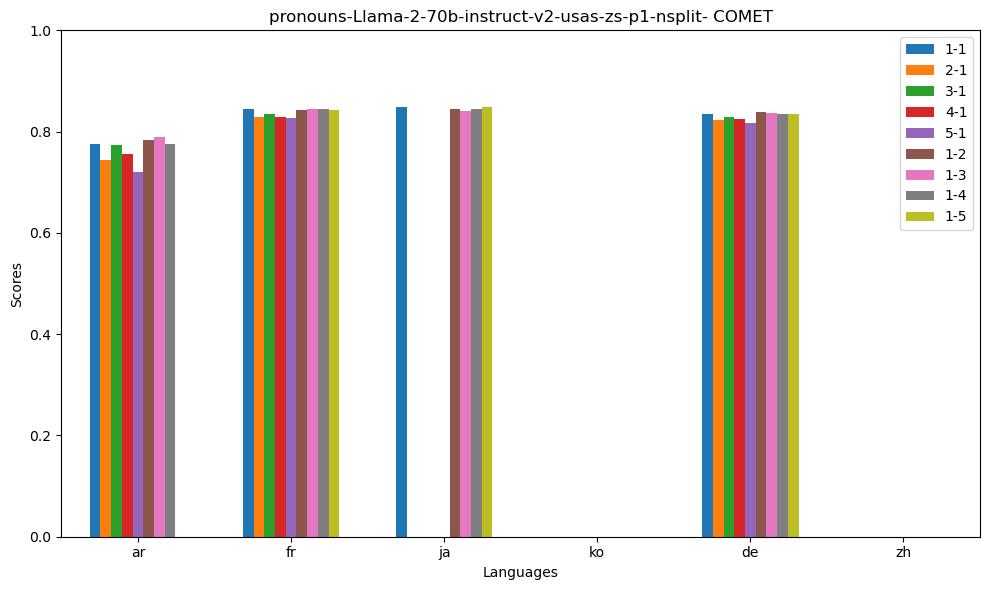

equivalent 1-1 exists


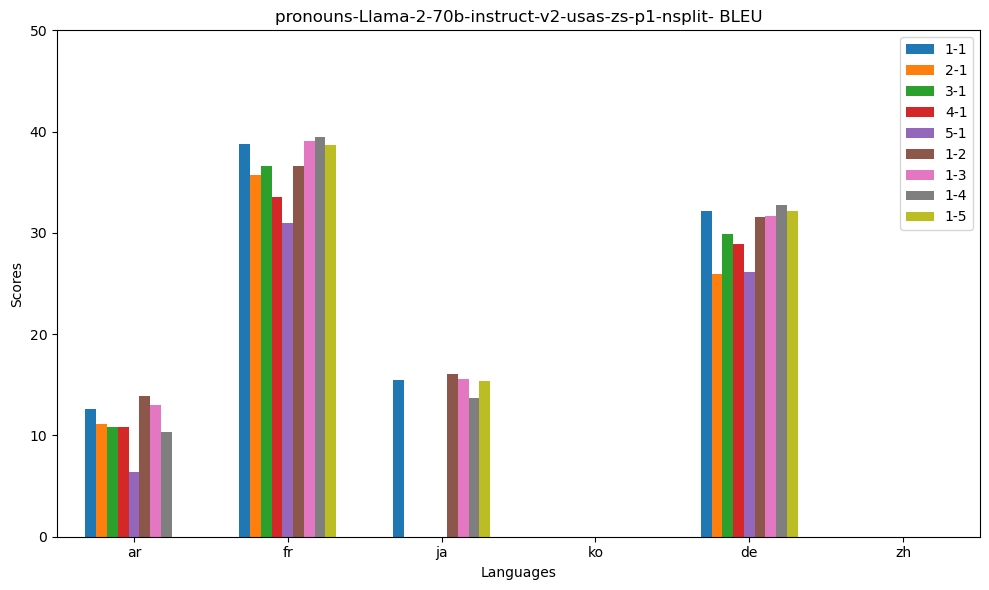

In [75]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = "pronouns", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50)) 

equivalent 1-1 exists


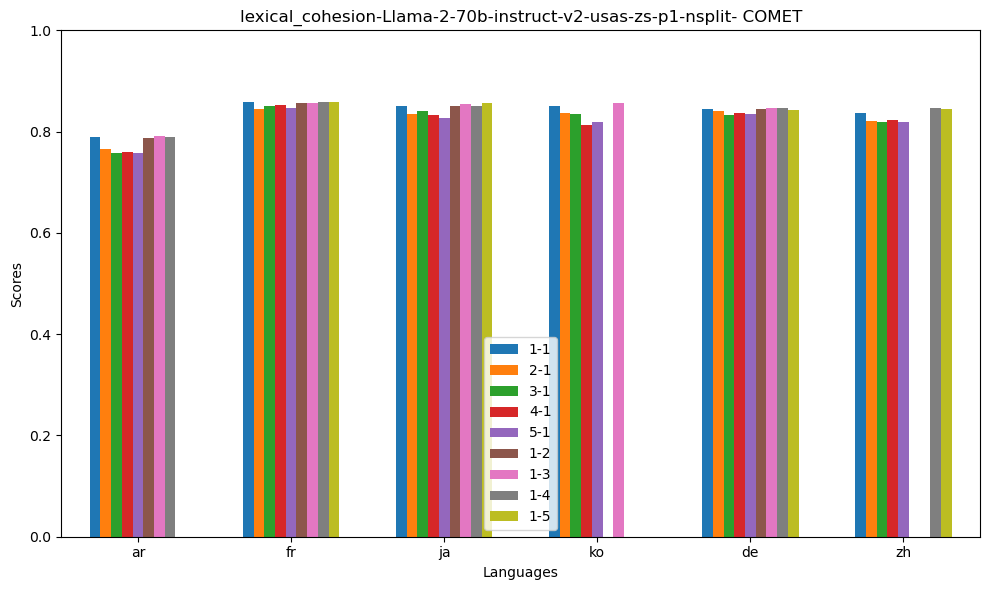

equivalent 1-1 exists


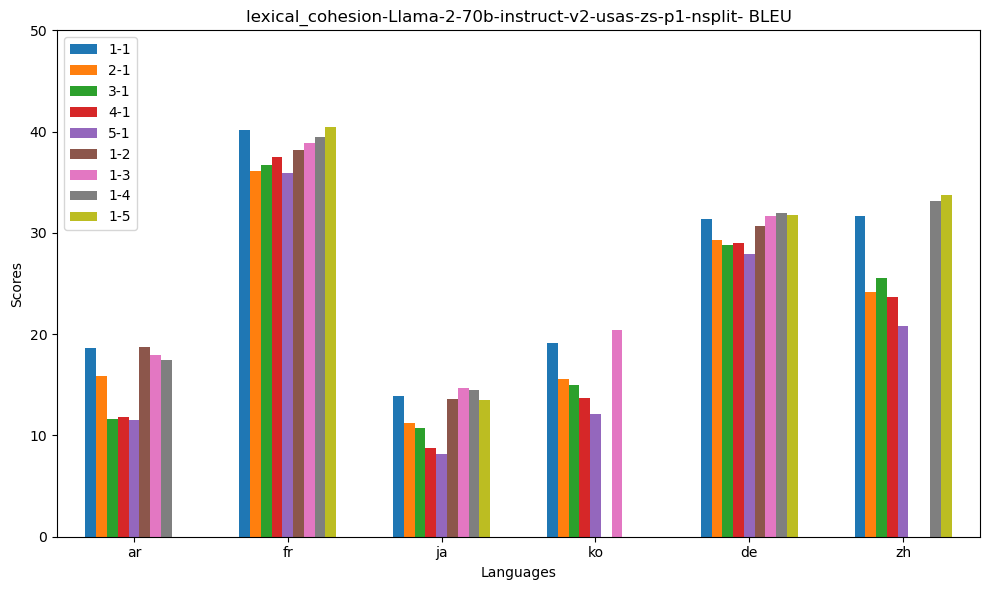

In [76]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = "lexical_cohesion", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50)) 

equivalent 1-1 exists


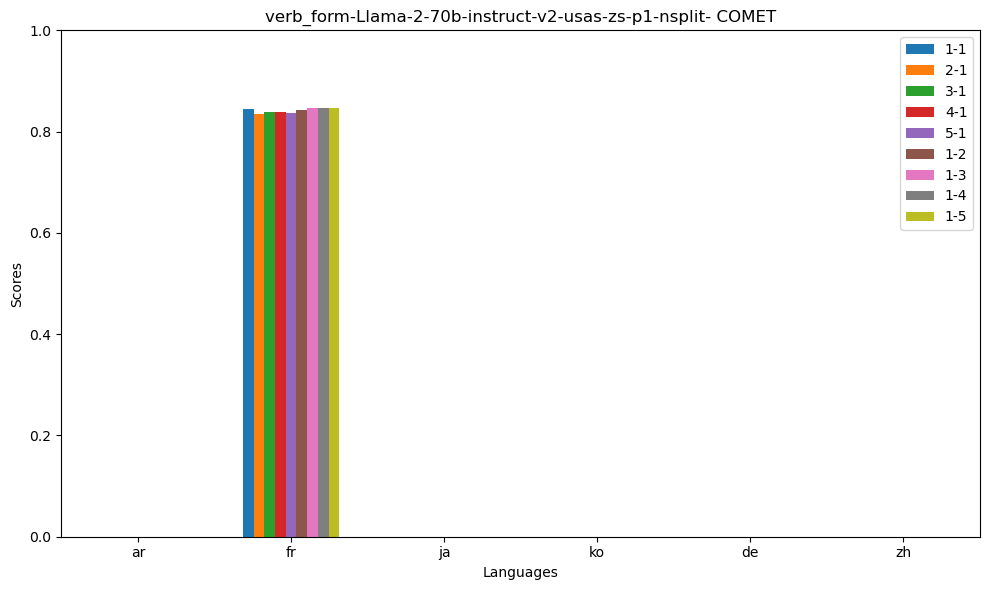

equivalent 1-1 exists


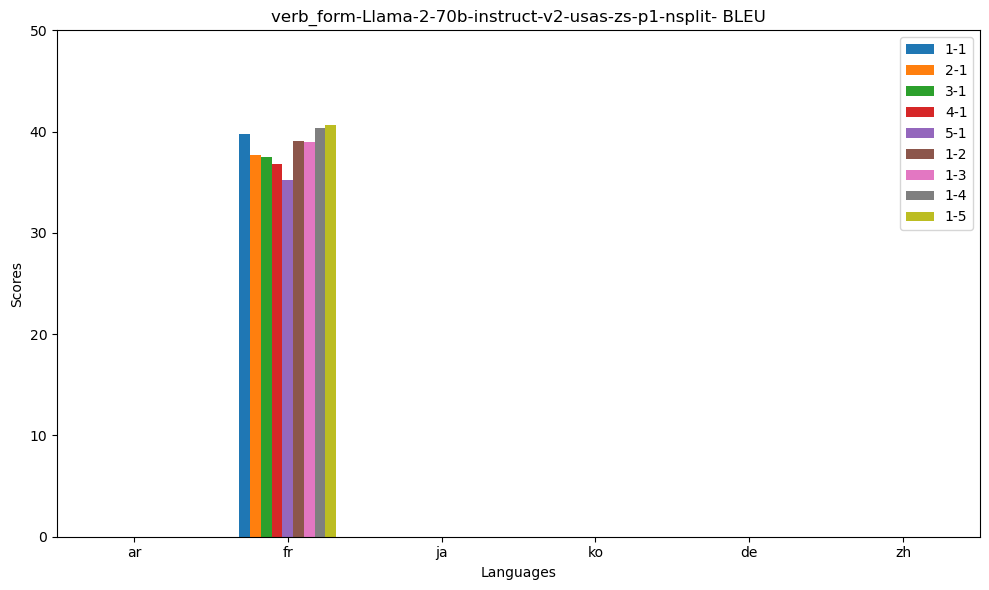

In [78]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = "verb_form", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50)) 

equivalent 1-1 exists


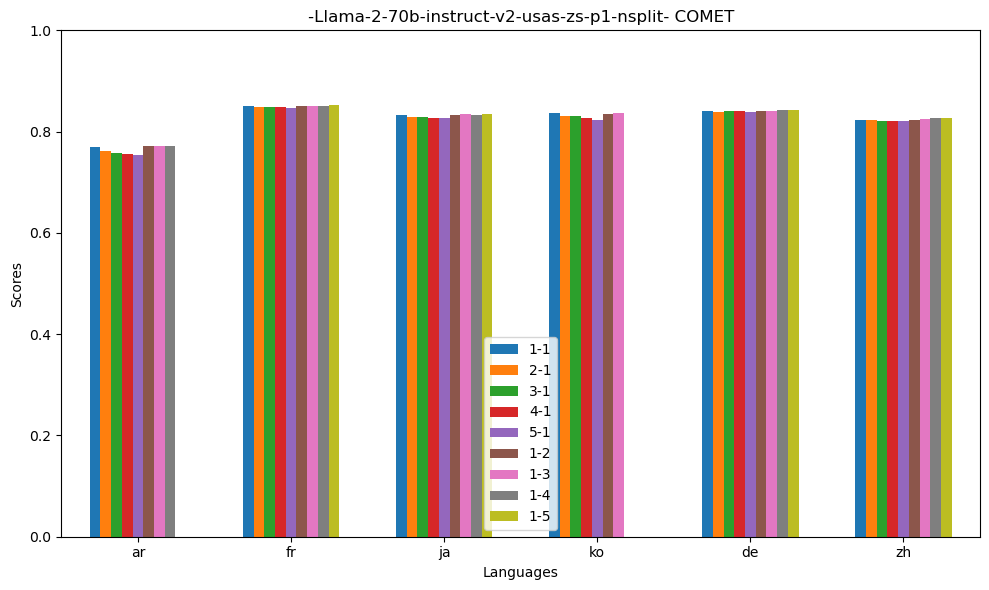

equivalent 1-1 exists


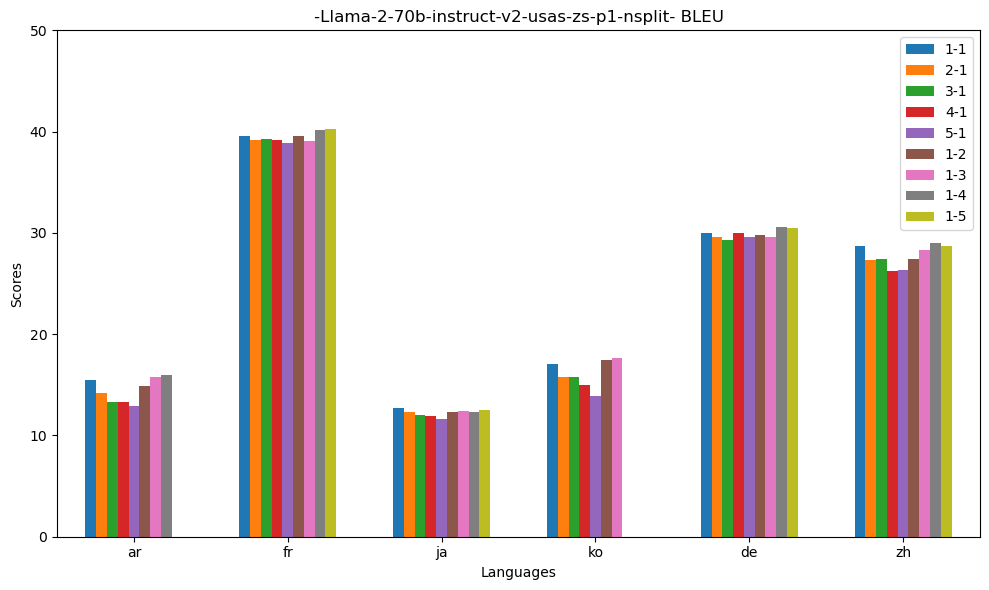

In [68]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = None, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50)) 

equivalent 1-1 exists


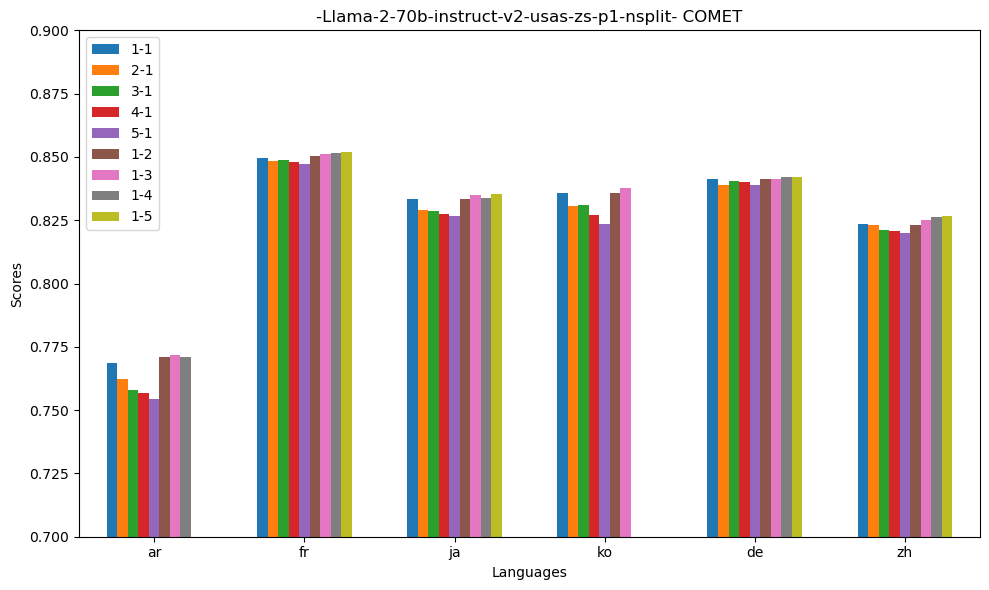

equivalent 1-1 exists


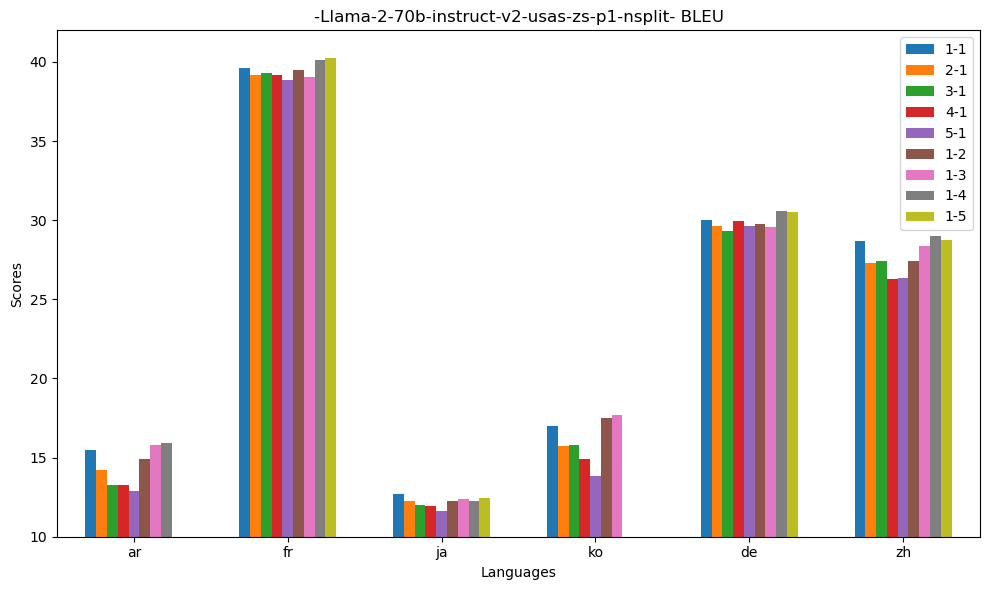

In [69]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category=None, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0.7,0.9), bleu=(10,42)) 

equivalent 1-1 exists


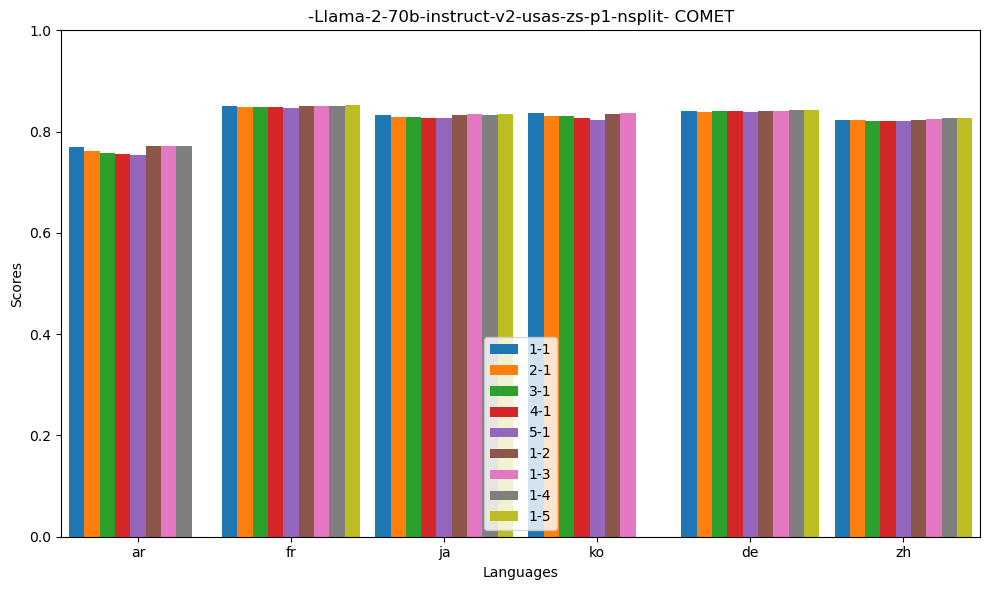

equivalent 1-1 exists


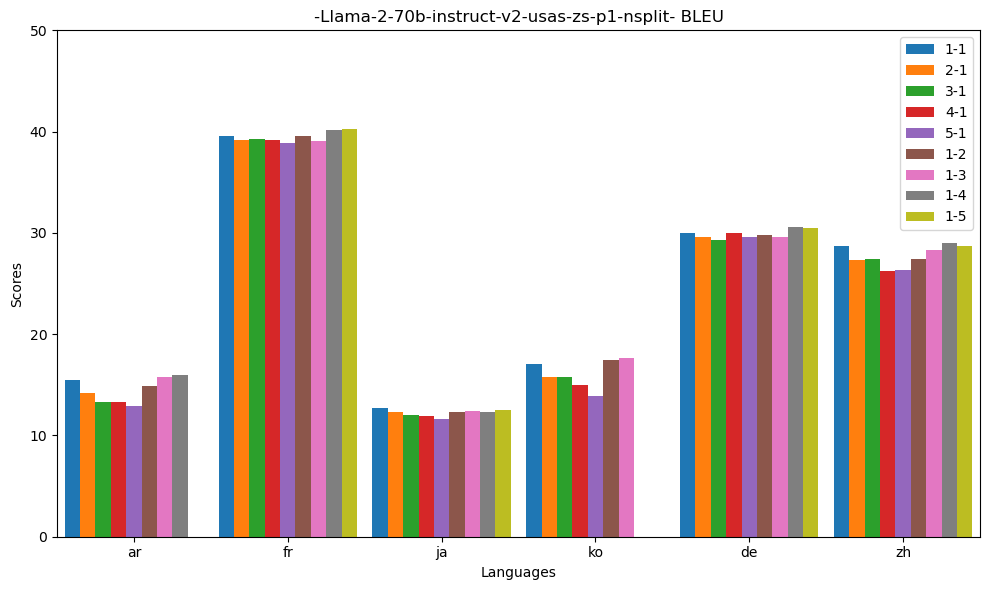

no
equivalent 1-1 exists


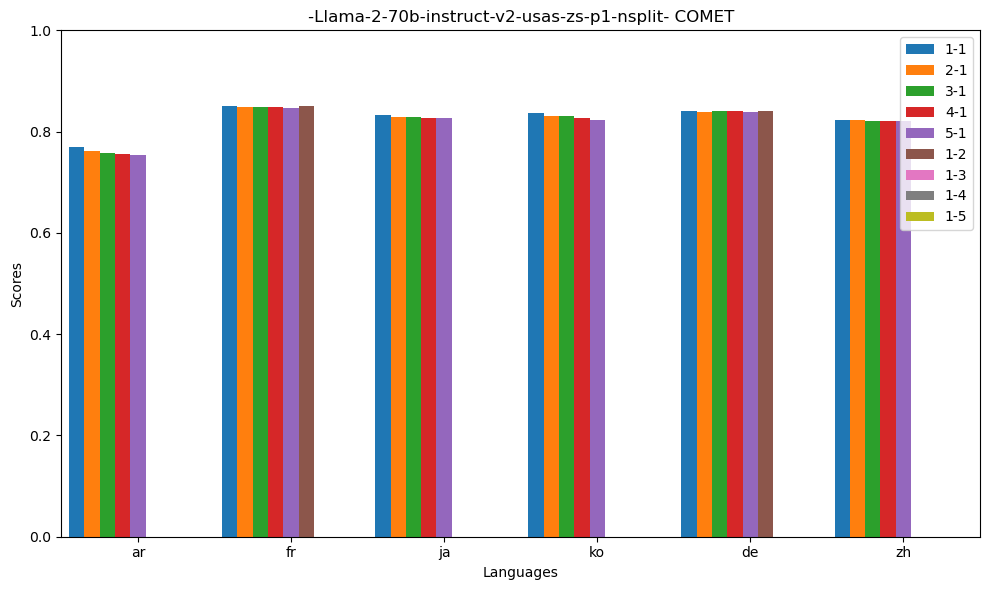

no
equivalent 1-1 exists
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no


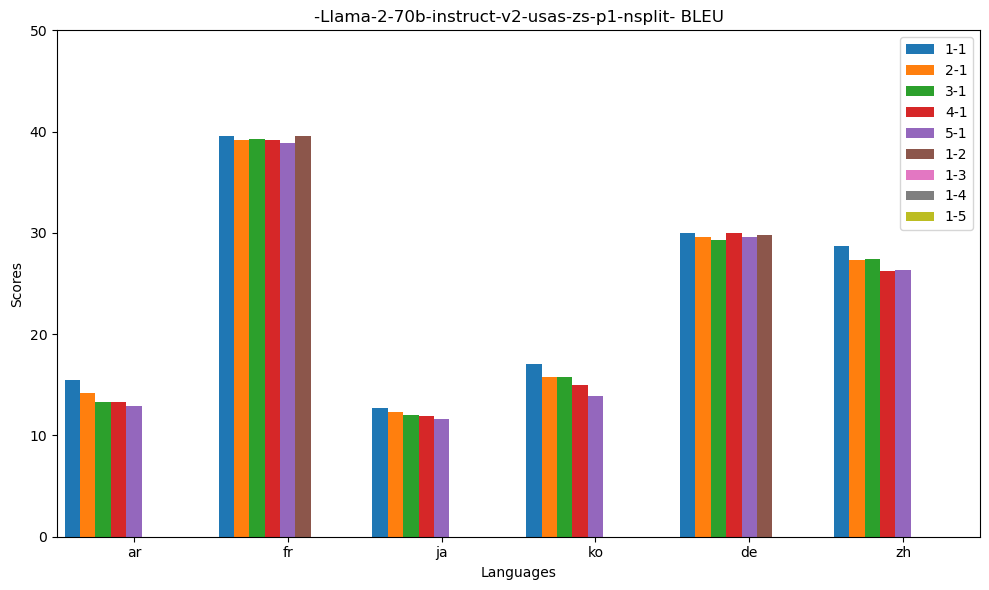

In [16]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50)) 

no
equivalent 1-1 exists


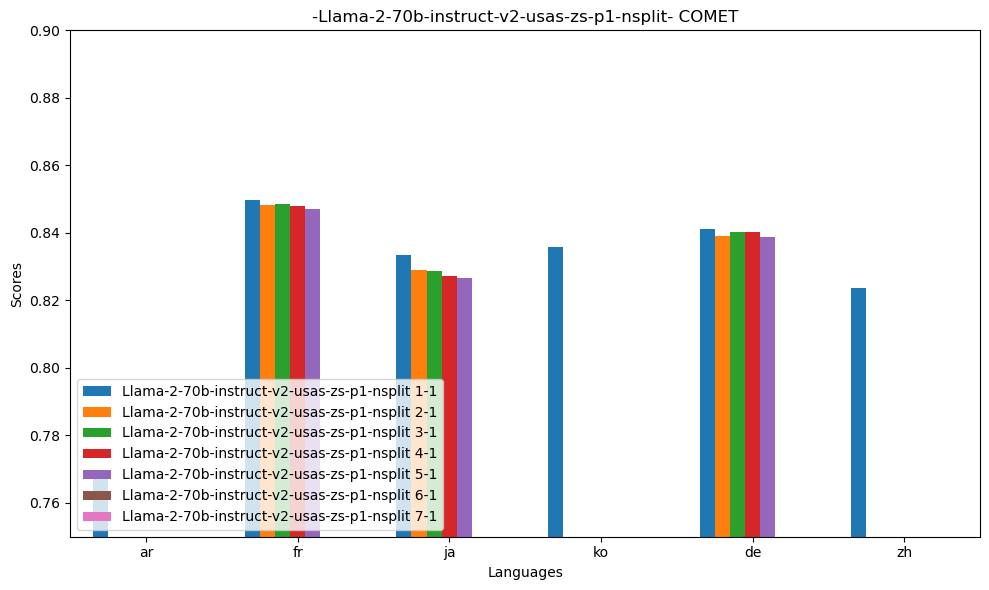

no
equivalent 1-1 exists
no
no
no
no
no
no
no
no
no
no
no
no
no
no


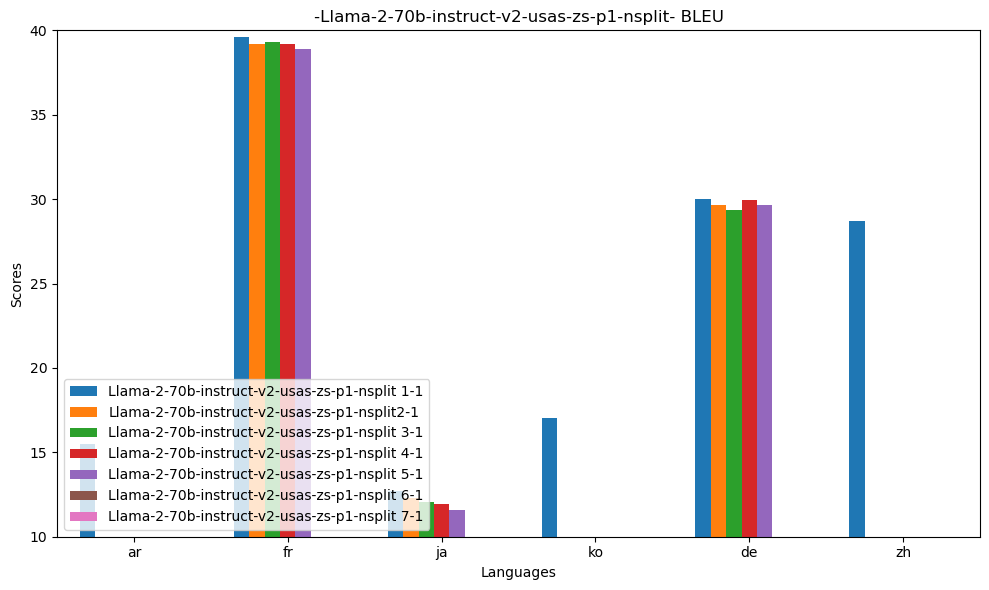

In [136]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0.75,0.9), bleu=(10,40)) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


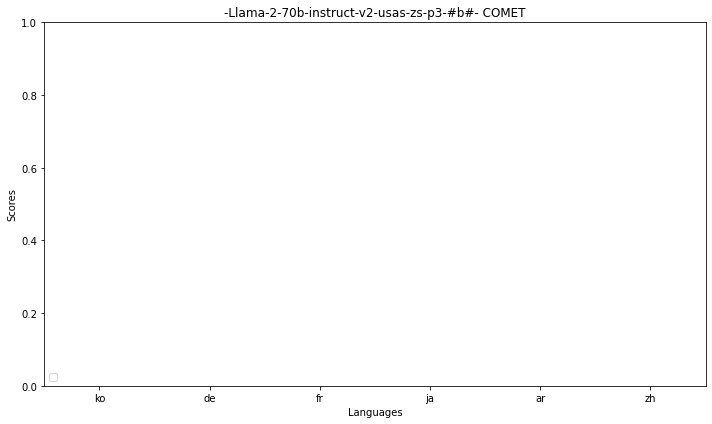

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


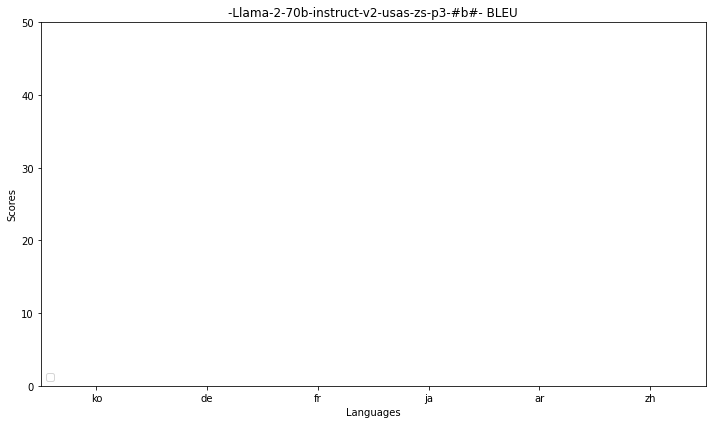

In [11]:
scores_plot("Llama-2-70b-instruct-v2-usas-zs-p3-#b#")

{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '1-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
equivalent 1-1 does not exists
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '2-1', 'comet_scores': [0.0, 0.8507, 0.8351, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 39.8969, 12.1987, 0.0, 0.0, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '3-1', 'comet_scores': [0.0, 0.8505, 0.8336, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 39.7704, 12.5317, 0.0, 0.0, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '4-1', 'comet_scores': [0.0, 0.8503, 0.8322, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 40.0348, 12.6842, 0.0, 0.0, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '5-1', 'comet_scores': [0.0, 0.8488, 0.8303, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 40.6207, 13.0061, 0.0, 0.0, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '6-1', 'comet_score

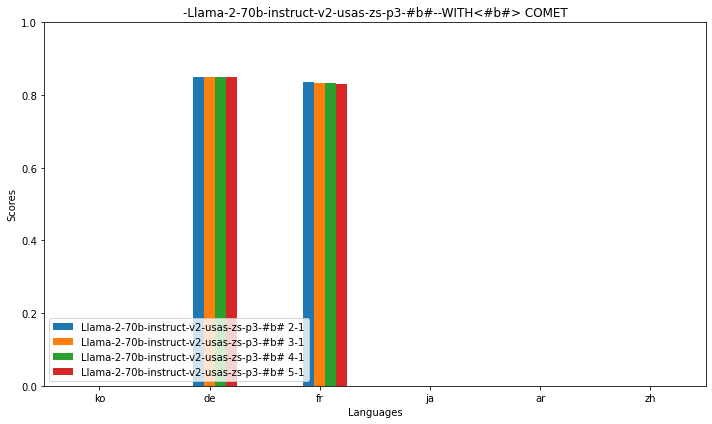

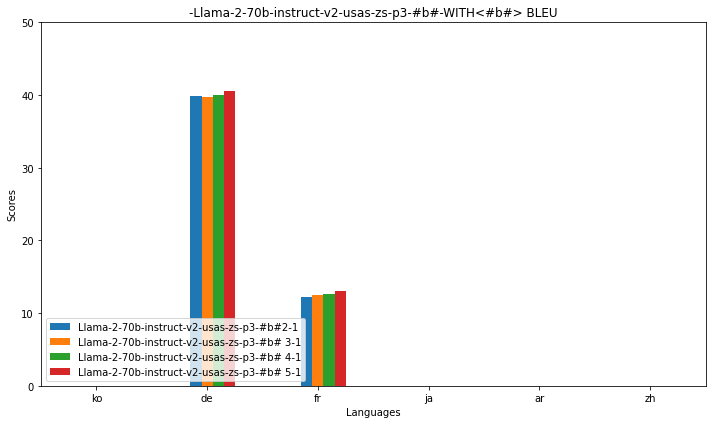

In [12]:
scores_plot_b("Llama-2-70b-instruct-v2-usas-zs-p3-#b#")

[{'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '1-1', 'comet_scores': [0.7687, 0.8496, 0.8335, 0.8358, 0.8411, 0.8237], 'bleu_scores': [15.4724, 39.5985, 12.7165, 17.0204, 30.0052, 28.6821]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '2-1', 'comet_scores': [0.0, 0.8483, 0.8289, 0.0, 0.8391, 0.0], 'bleu_scores': [0.0, 39.1726, 12.277, 0.0, 29.6326, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '3-1', 'comet_scores': [0.0, 0.8486, 0.8287, 0.0, 0.8403, 0.0], 'bleu_scores': [0.0, 39.2936, 12.0318, 0.0, 29.3462, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '4-1', 'comet_scores': [0.0, 0.8479, 0.8273, 0.0, 0.8402, 0.0], 'bleu_scores': [0.0, 39.1821, 11.9398, 0.0, 29.9519, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '5-1', 'comet_scores': [0.0, 0.8472, 0.8265, 0.0, 0.8389, 0.0], 'bleu_scores': [0.0, 38.889, 11.6037, 0.0, 29.6382, 0.0]}, {'model': 'Llama-2-70b-in

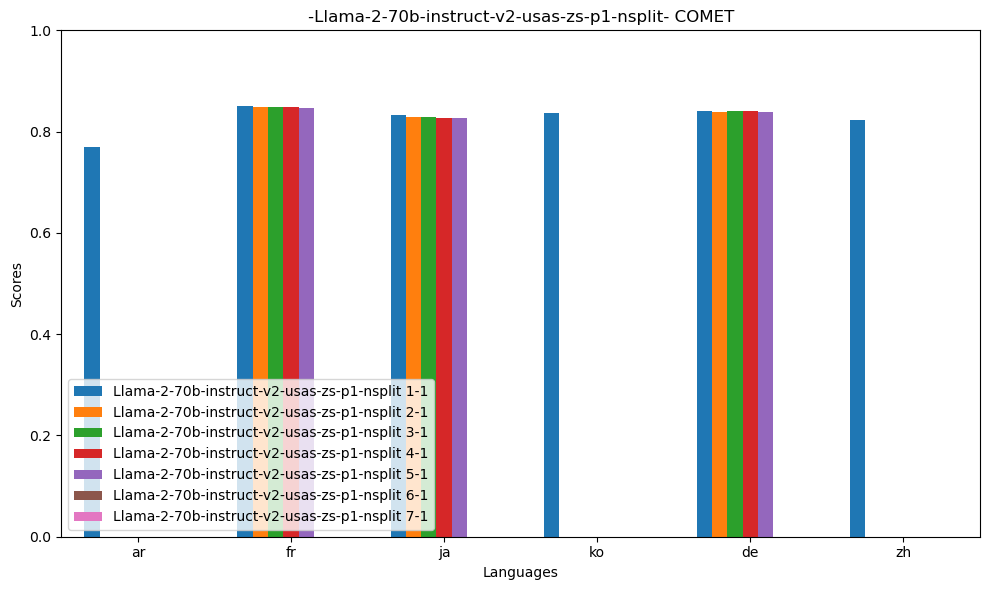

no
equivalent 1-1 exists
no
no
no
no
no
no
no
no


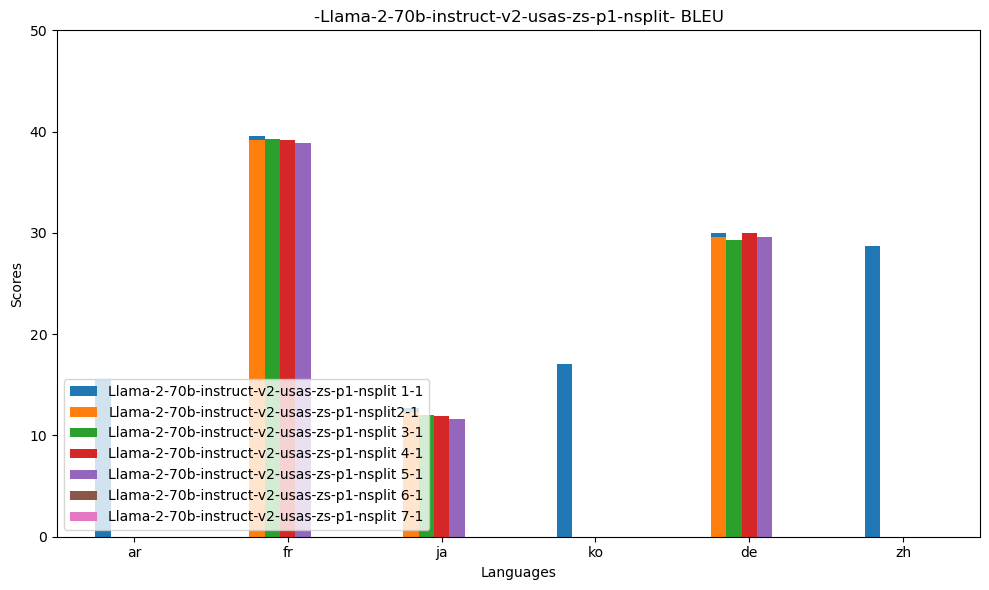

[{'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '1-1', 'comet_scores': [0.7687, 0.8496, 0.8335, 0.8358, 0.8411, 0.8237], 'bleu_scores': [15.4724, 39.5985, 12.7165, 17.0204, 30.0052, 28.6821]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '2-1', 'comet_scores': [0.0, 0.8483, 0.8289, 0.0, 0.8391, 0.0], 'bleu_scores': [0.0, 39.1726, 12.277, 0.0, 29.6326, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '3-1', 'comet_scores': [0.0, 0.8486, 0.8287, 0.0, 0.8403, 0.0], 'bleu_scores': [0.0, 39.2936, 12.0318, 0.0, 29.3462, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '4-1', 'comet_scores': [0.0, 0.8479, 0.8273, 0.0, 0.8402, 0.0], 'bleu_scores': [0.0, 39.1821, 11.9398, 0.0, 29.9519, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '5-1', 'comet_scores': [0.0, 0.8472, 0.8265, 0.0, 0.8389, 0.0], 'bleu_scores': [0.0, 38.889, 11.6037, 0.0, 29.6382, 0.0]}, {'model': 'Llama-2-70b-in

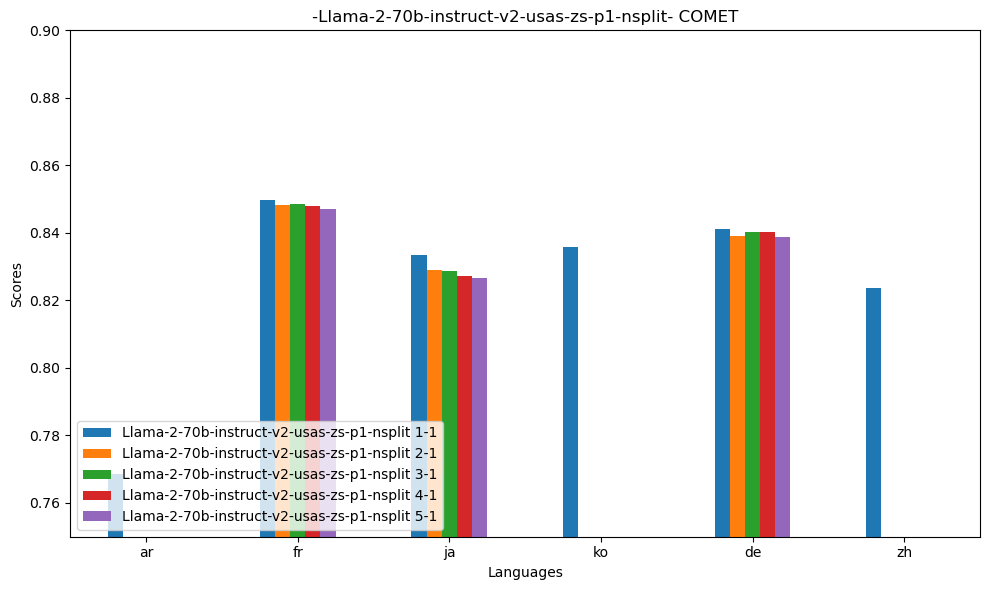

no
equivalent 1-1 exists
no
no
no
no
no
no
no
no


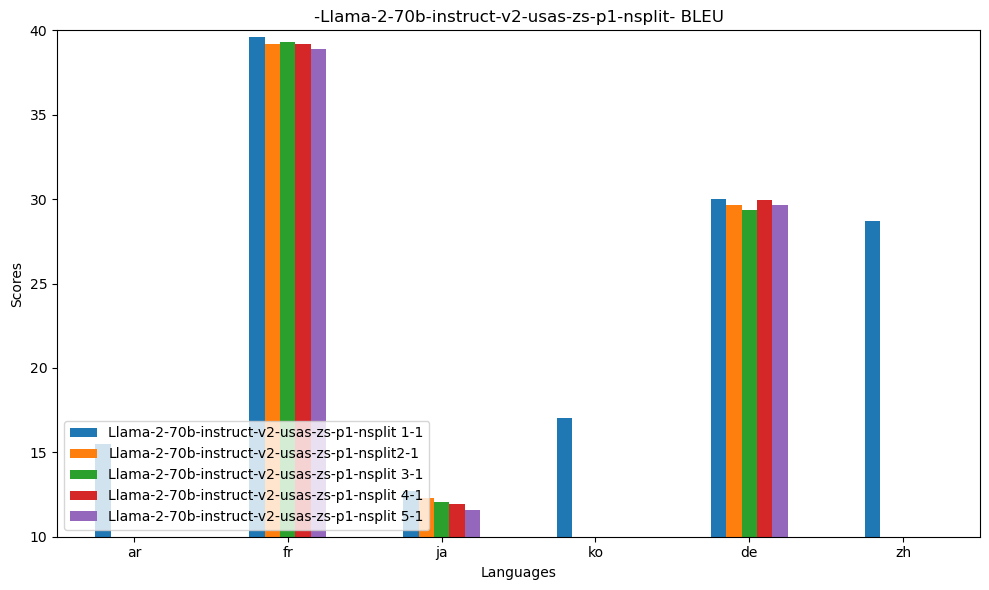

In [30]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0.75,0.9), bleu=(10,40)) 

In [ ]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0.75,0.9), bleu=(10,40)) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


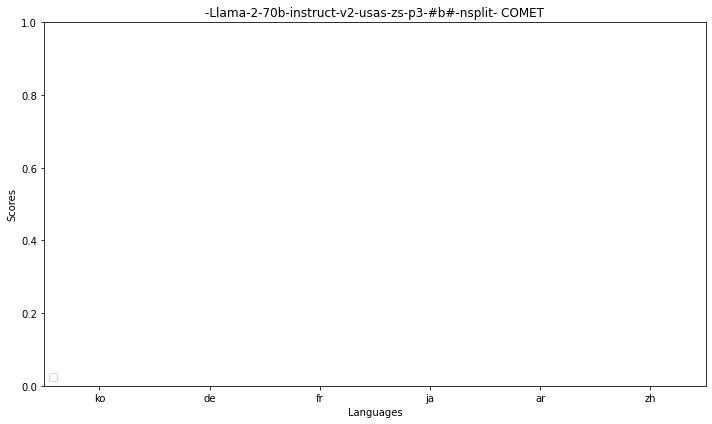

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


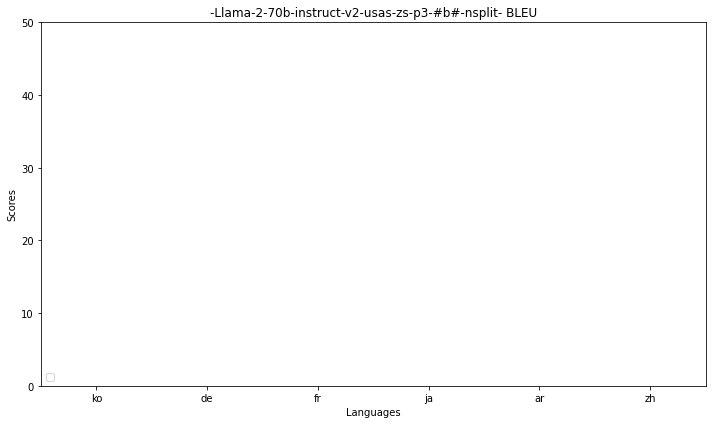

In [14]:
scores_plot("Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit")

{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '1-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
equivalent 1-1 does not exists
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '2-1', 'comet_scores': [0.0, 0.0, 0.8347, 0.0, 0.8429, 0.0], 'bleu_scores': [0.0, 0.0, 12.4581, 0.0, 29.9477, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '3-1', 'comet_scores': [0.0, 0.0, 0.833, 0.0, 0.8434, 0.0], 'bleu_scores': [0.0, 0.0, 12.5005, 0.0, 30.42, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '4-1', 'comet_scores': [0.0, 0.0, 0.8312, 0.0, 0.8419, 0.0], 'bleu_scores': [0.0, 0.0, 12.6585, 0.0, 30.3739, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '5-1', 'comet_scores': [0.0, 0.0, 0.8312, 0.0, 0.8398, 0.0], 'bleu_scores': [0.0, 0.0, 13.1039, 0.0, 30.2057, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-n

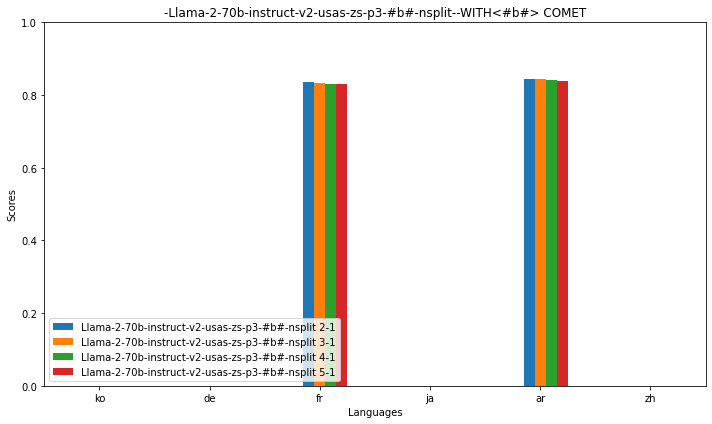

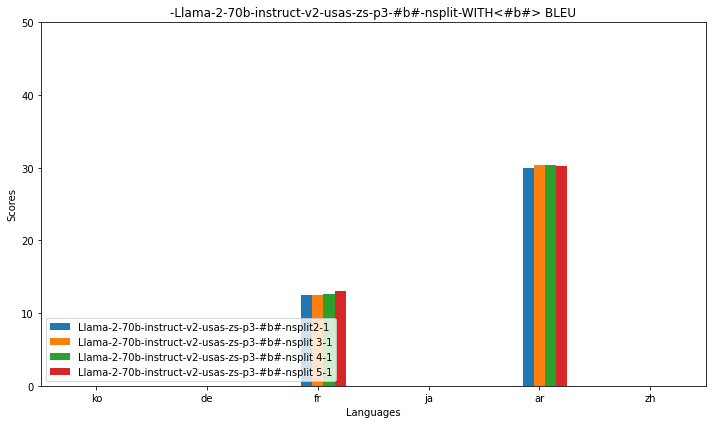

In [15]:
scores_plot_b("Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


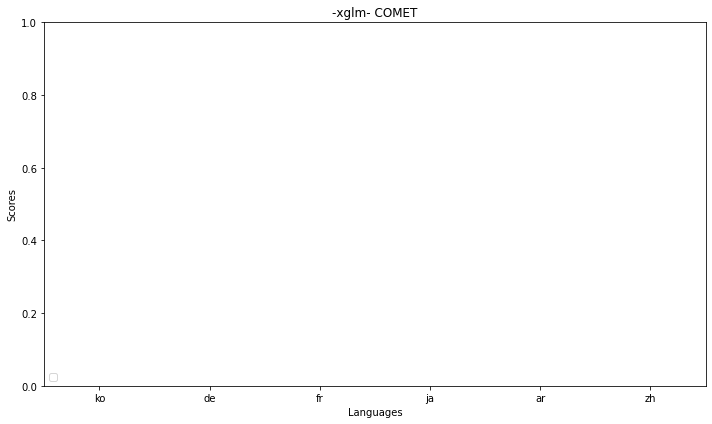

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


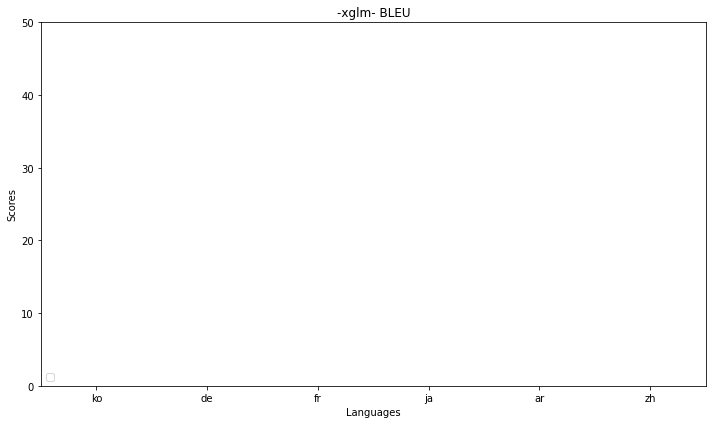

In [16]:
scores_plot("xglm")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


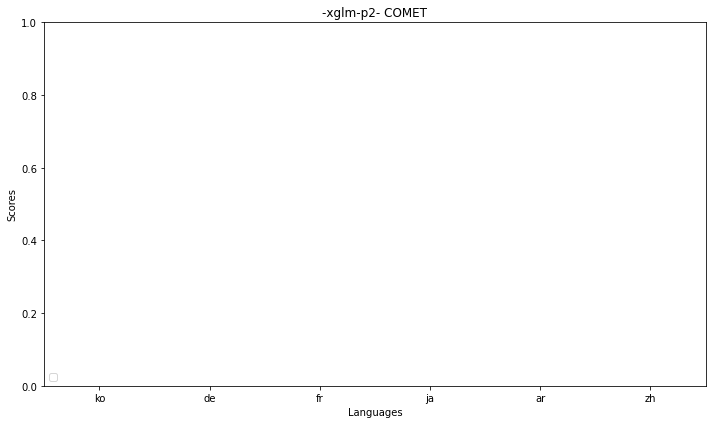

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


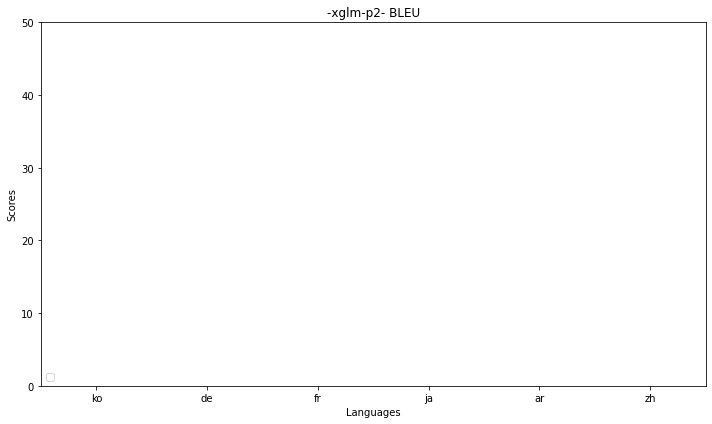

In [17]:
scores_plot("xglm-p2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


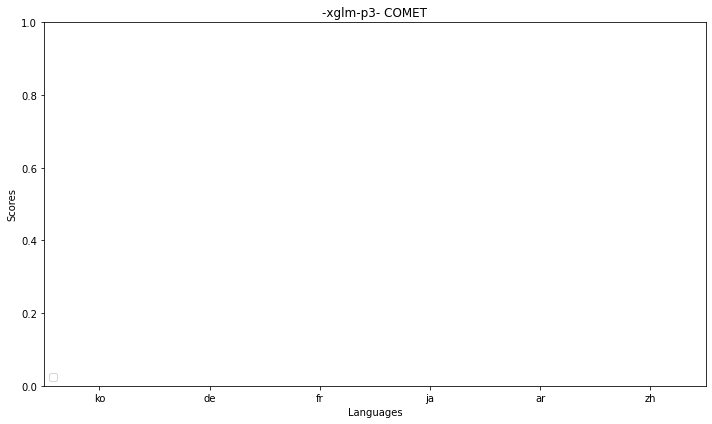

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


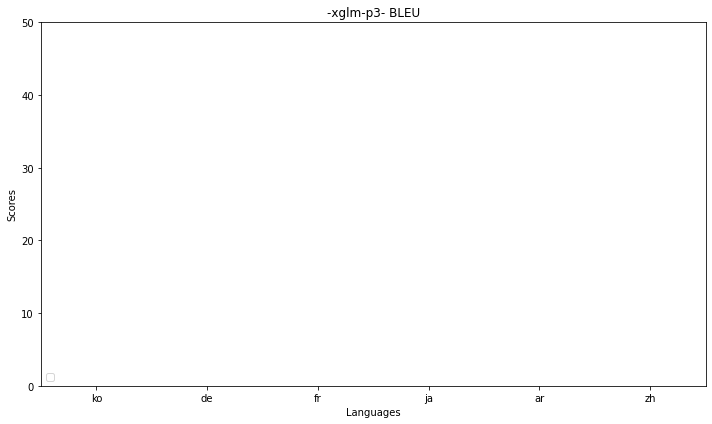

In [18]:
scores_plot("xglm-p3")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


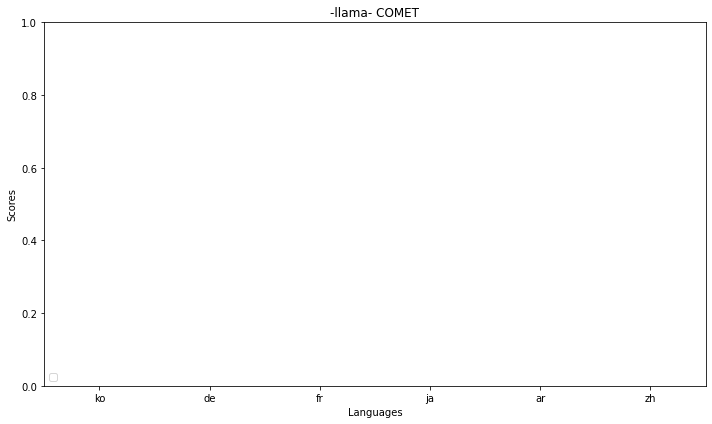

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


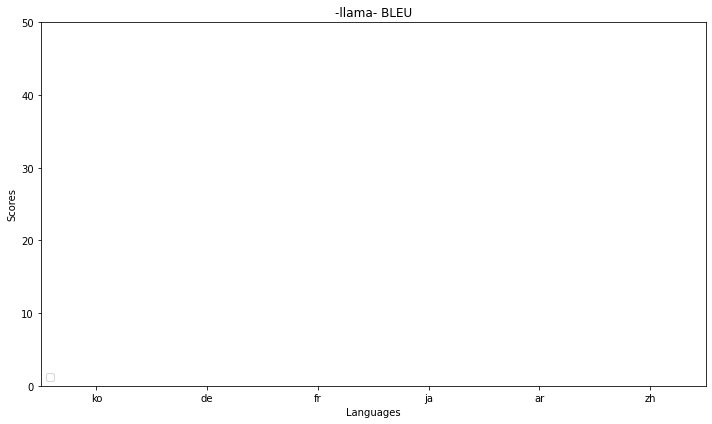

In [19]:
scores_plot("llama")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


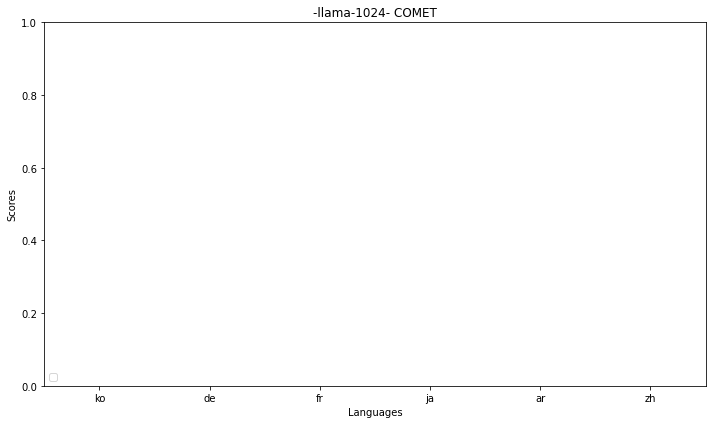

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


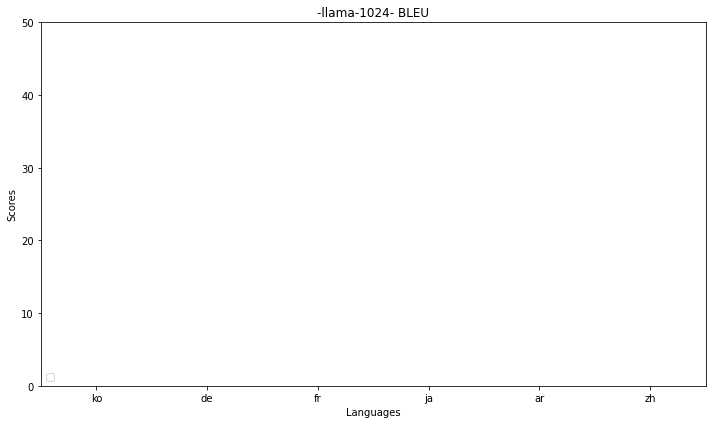

In [20]:
scores_plot("llama-1024")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


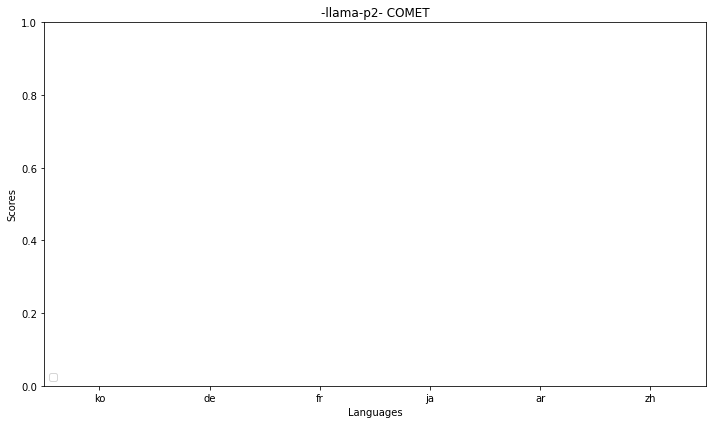

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


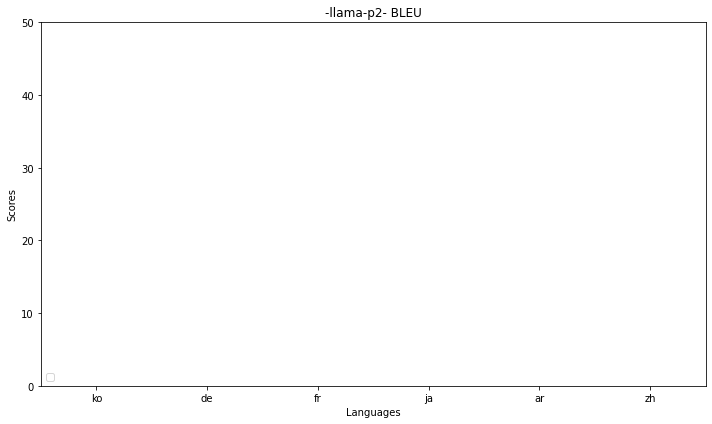

In [21]:
scores_plot("llama-p2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


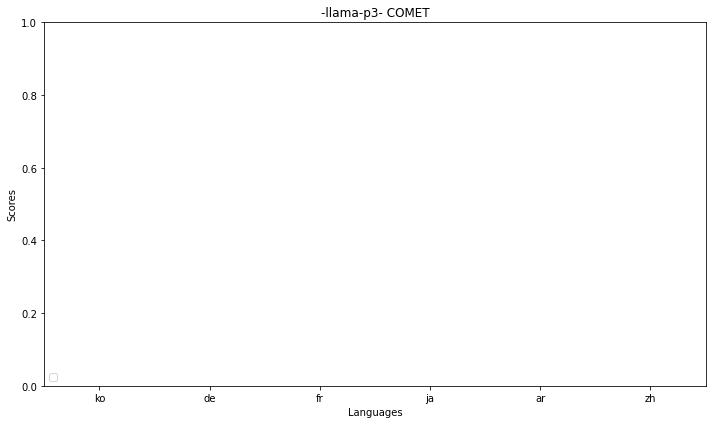

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


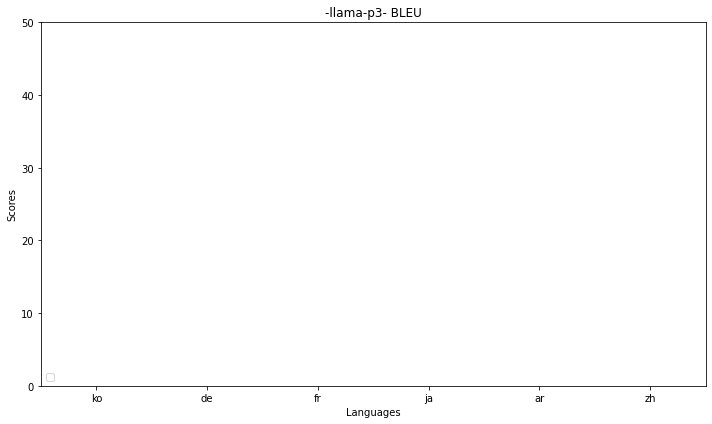

In [22]:
scores_plot("llama-p3")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


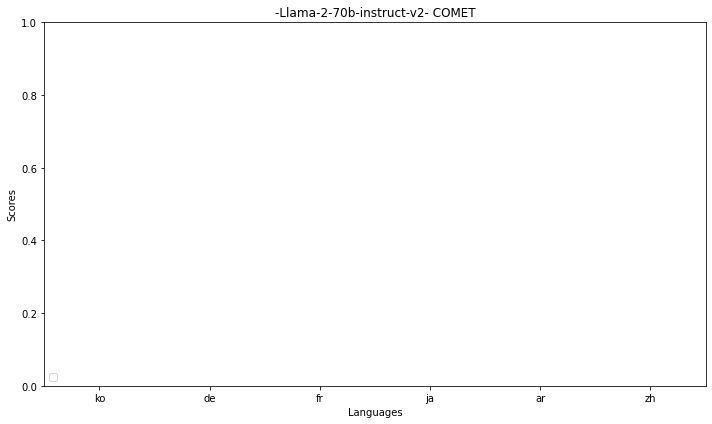

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


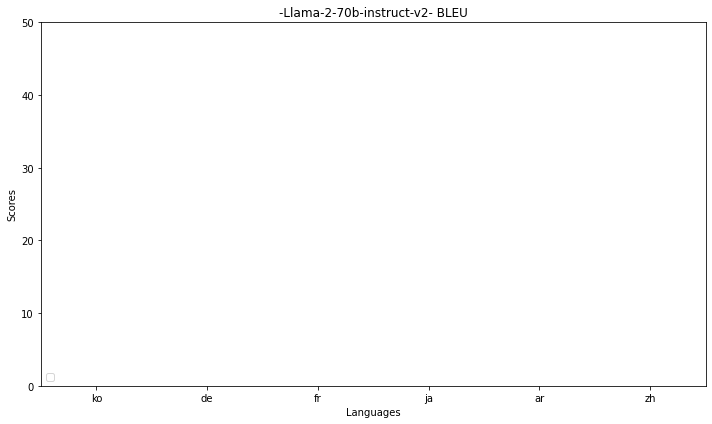

In [23]:
scores_plot("Llama-2-70b-instruct-v2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


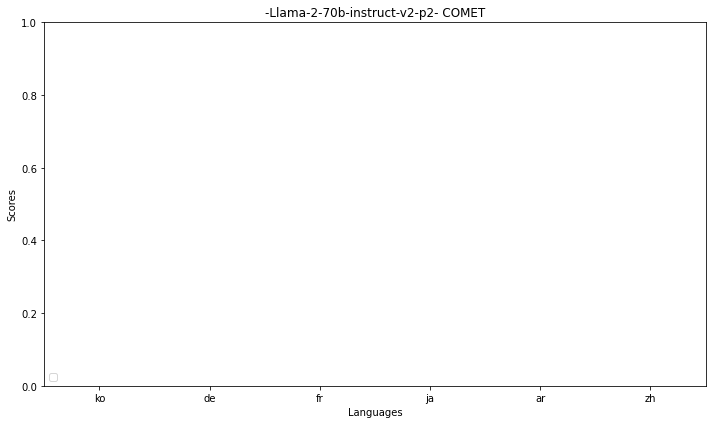

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


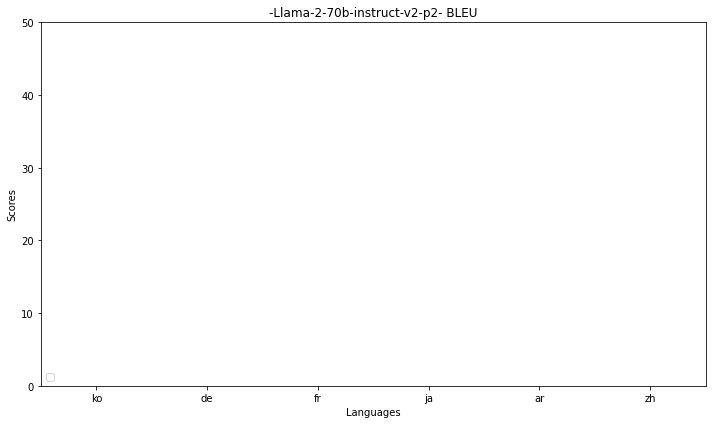

In [24]:
scores_plot("Llama-2-70b-instruct-v2-p2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


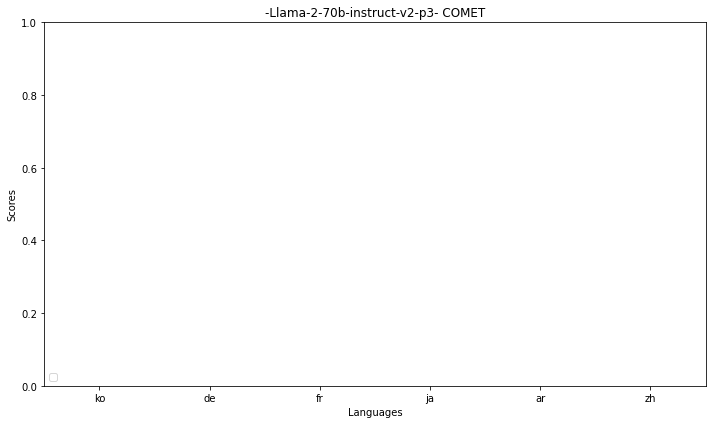

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


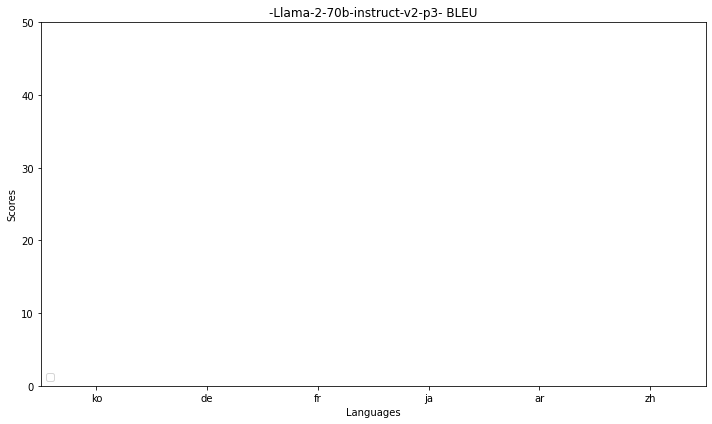

In [25]:
scores_plot("Llama-2-70b-instruct-v2-p3")